# `OLA DRIVER PROJECT`

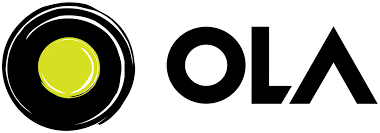

## Problem Statement

### _Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates._

### _As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones._

### _You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like_

#### 1) Demographics (city, age, gender etc.)
#### 2)Tenure information (joining date, Last Date)
#### 3) Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

## `Column Profiling:`

**`MMMM-YY`** : Reporting Date (Monthly)

**`Driver_ID`** : Unique id for drivers

**`Age`** : Age of the driver

**`Gender`** : Gender of the driver – Male : 0, Female: 1

**`City`** : City Code of the driver

**`Education_Level`** : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

**`Income`** : Monthly average Income of the driver

**`Date Of Joining`** : Joining date for the driver

**`LastWorkingDate`** : Last date of working for the driver

**`Joining Designation`** : Designation of the driver at the time of joining

**`Grade`** : Grade of the driver at the time of reporting

**`Total Business Value`** : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)

**`Quarterly Rating`** : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot') 

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
import plotly
import plotly.graph_objs as go

In [4]:
ola = pd.read_csv('ola_driver_scaler.csv')

In [5]:
ola.head()

Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0  01/01/19          1  28.0     0.0  C23                2   
1           1  02/01/19          1  28.0     0.0  C23                2   
2           2  03/01/19          1  28.0     0.0  C23                2   
3           3  11/01/20          2  31.0     0.0   C7                2   
4           4  12/01/20          2  31.0     0.0   C7                2   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387      24/12/18             NaN                    1      1   
1   57387      24/12/18             NaN                    1      1   
2   57387      24/12/18        03/11/19                    1      1   
3   67016      11/06/20             NaN                    2      2   
4   67016      11/06/20             NaN                    2      2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 2  
2                     0                 2  
3                     0                 1  
4                     0                 1

In [6]:
p = ola[['Driver_ID','MMM-YY','Dateofjoining']]

In [7]:
p[p['Driver_ID'] == 6]

Driver_ID    MMM-YY Dateofjoining
13          6  08/01/20      31/07/20
14          6  09/01/20      31/07/20
15          6  10/01/20      31/07/20
16          6  11/01/20      31/07/20
17          6  12/01/20      31/07/20

In [8]:
p[p['Driver_ID'] == 8]

Driver_ID    MMM-YY Dateofjoining
18          8  09/01/20      19/09/20
19          8  10/01/20      19/09/20
20          8  11/01/20      19/09/20

In [9]:
p[p['Driver_ID'] == 1]

Driver_ID    MMM-YY Dateofjoining
0          1  01/01/19      24/12/18
1          1  02/01/19      24/12/18
2          1  03/01/19      24/12/18

In [10]:
ola[ola['Driver_ID'] == 6]

Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
13          13  08/01/20          6  31.0     1.0  C11                1   
14          14  09/01/20          6  31.0     1.0  C11                1   
15          15  10/01/20          6  31.0     1.0  C11                1   
16          16  11/01/20          6  31.0     1.0  C11                1   
17          17  12/01/20          6  31.0     1.0  C11                1   

    Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
13   78728      31/07/20             NaN                    3      3   
14   78728      31/07/20             NaN                    3      3   
15   78728      31/07/20             NaN                    3      3   
16   78728      31/07/20             NaN                    3      3   
17   78728      31/07/20             NaN                    3      3   

    Total Business Value  Quarterly Rating  
13                     0                 1  
14                     0                 1  
15                     0                 2  
16               1265000                 2  
17                     0                 2

In [11]:
ola[ola['Driver_ID'] == 8]

Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
18          18  09/01/20          8  34.0     0.0   C2                0   
19          19  10/01/20          8  34.0     0.0   C2                0   
20          20  11/01/20          8  34.0     0.0   C2                0   

    Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
18   70656      19/09/20             NaN                    3      3   
19   70656      19/09/20             NaN                    3      3   
20   70656      19/09/20        15/11/20                    3      3   

    Total Business Value  Quarterly Rating  
18                     0                 1  
19                     0                 1  
20                     0                 1

# `EXPLORATORY DATA ANALYSIS`

In [12]:
print('Rows in the ola dataset: ',ola.shape[0])
print('Columns in the ola dataset: ',ola.shape[1])

Rows in the ola dataset:  19104
Columns in the ola dataset:  14


In [13]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [14]:
ola.nunique()

Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [15]:
ola.isna().sum()/ola.shape[0]*100

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [16]:
for i in ola.columns:
    print(ola[i])
    print(ola[i].unique())
    print("*"*100)

0            0
1            1
2            2
3            3
4            4
         ...  
19099    19099
19100    19100
19101    19101
19102    19102
19103    19103
Name: Unnamed: 0, Length: 19104, dtype: int64
[    0     1     2 ... 19101 19102 19103]
****************************************************************************************************
0        01/01/19
1        02/01/19
2        03/01/19
3        11/01/20
4        12/01/20
           ...   
19099    08/01/20
19100    09/01/20
19101    10/01/20
19102    11/01/20
19103    12/01/20
Name: MMM-YY, Length: 19104, dtype: object
['01/01/19' '02/01/19' '03/01/19' '11/01/20' '12/01/20' '12/01/19'
 '01/01/20' '02/01/20' '03/01/20' '04/01/20' '08/01/20' '09/01/20'
 '10/01/20' '07/01/19' '08/01/19' '09/01/19' '10/01/19' '11/01/19'
 '04/01/19' '05/01/19' '06/01/19' '05/01/20' '06/01/20' '07/01/20']
****************************************************************************************************
0           1
1           1
2      

[2381060 -665480       0 ...  497690  740280  448370]
****************************************************************************************************
0        2
1        2
2        2
3        1
4        1
        ..
19099    3
19100    3
19101    2
19102    2
19103    2
Name: Quarterly Rating, Length: 19104, dtype: int64
[2 1 4 3]
****************************************************************************************************


In [17]:
ola.describe()

Unnamed: 0     Driver_ID           Age        Gender  \
count  19104.000000  19104.000000  19043.000000  19052.000000   
mean    9551.500000   1415.591133     34.668435      0.418749   
std     5514.994107    810.705321      6.257912      0.493367   
min        0.000000      1.000000     21.000000      0.000000   
25%     4775.750000    710.000000     30.000000      0.000000   
50%     9551.500000   1417.000000     34.000000      0.000000   
75%    14327.250000   2137.000000     39.000000      1.000000   
max    19103.000000   2788.000000     58.000000      1.000000   

       Education_Level         Income  Joining Designation         Grade  \
count     19104.000000   19104.000000         19104.000000  19104.000000   
mean          1.021671   65652.025126             1.690536      2.252670   
std           0.800167   30914.515344             0.836984      1.026512   
min           0.000000   10747.000000             1.000000      1.000000   
25%           0.000000   42383.000000             1.000000      1.000000   
50%           1.000000   60087.000000             1.000000      2.000000   
75%           2.000000   83969.000000             2.000000      3.000000   
max           2.000000  188418.000000             5.000000      5.000000   

       Total Business Value  Quarterly Rating  
count          1.910400e+04      19104.000000  
mean           5.716621e+05          2.008899  
std            1.128312e+06          1.009832  
min           -6.000000e+06          1.000000  
25%            0.000000e+00          1.000000  
50%            2.500000e+05          2.000000  
75%            6.997000e+05          3.000000  
max            3.374772e+07          4.000000

In [18]:
ola.describe(include='object')

MMM-YY   City Dateofjoining LastWorkingDate
count      19104  19104         19104            1616
unique        24     29           869             493
top     01/01/19    C20      23/07/15        29/07/20
freq        1022   1008           192              70

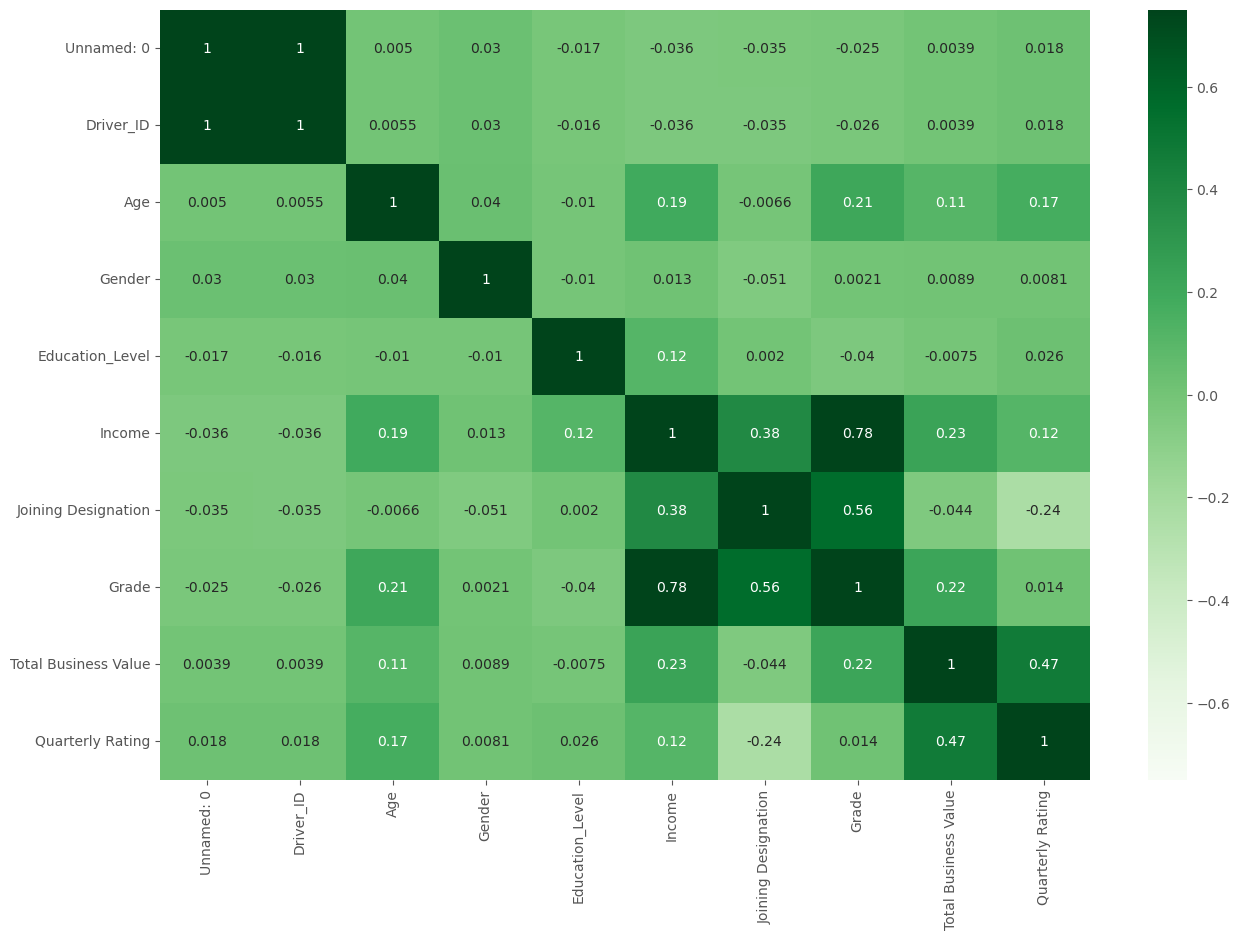

In [19]:
corr = ola.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='Greens',vmax=0.75,vmin=-0.75)
plt.show()

**`INSIGHTS:`**

- Driver_ID and Unnamed: 0 can be considered redundant; one can be removed.
- Higher Income is associated with a higher Grade.
- Higher Income is linked with better Joining Designation.
- Older drivers tend to have higher Grades.
- Drivers with higher Income tend to bring more Total Business Value.
- Higher Total Business Value leads to better Quarterly Ratings.
- Gender has minimal impact on other variables, suggesting no strong gender-based trends.
- Higher Education_Level slightly increases Income.
- Lower Joining Designation is associated with better Quarterly Ratings.
- High correlation between Driver_ID and Unnamed: 0 suggests they track similar information.

# `DATA PROCESSING AND FEATURE ENGINEERING`

In [20]:
ola1 = ola.copy(deep=True)

In [21]:
# # Target variable creation: Create a column called target which tells whether the driver has left the company- 
# # driver whose last working day is present will have the value 1

first =  (ola1.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
first['LastWorkingDate'].replace({True:1,False:0},inplace=True)
first.rename(columns={'LastWorkingDate':'target'},inplace=True)
first.head()

Driver_ID  target
0          1       0
1          2       1
2          4       0
3          5       0
4          6       1

In [22]:
# Create a column which tells whether the quarterly rating has increased for that driver - 
# for those whose quarterly rating has increased we assign the value 1
QR1 =  (ola1.groupby('Driver_ID').agg({'Grade':'first'})['Grade']).reset_index()
QR2 = (ola1.groupby('Driver_ID').agg({'Grade':'last'})['Grade']).reset_index()

In [23]:
QR1.head()

Driver_ID  Grade
0          1      1
1          2      2
2          4      2
3          5      1
4          6      3

In [24]:
QR2.head()

Driver_ID  Grade
0          1      1
1          2      2
2          4      2
3          5      1
4          6      3

In [25]:
QR1.shape,QR2.shape

((2381, 2), (2381, 2))

In [26]:
QR1.isna().sum(),QR2.isna().sum()

(Driver_ID    0
 Grade        0
 dtype: int64,
 Driver_ID    0
 Grade        0
 dtype: int64)

In [27]:
first = first.merge(QR1,on='Driver_ID')
first = first.merge(QR2,on='Driver_ID')

In [28]:
first.tail()

Driver_ID  target  Grade_x  Grade_y
2376       2784       1        3        3
2377       2785       0        1        1
2378       2786       0        2        2
2379       2787       0        1        1
2380       2788       1        2        2

In [29]:
first['GradeUp'] = np.where(first['Grade_x'] < first['Grade_y'], 1,0)

In [30]:
first['GradeUp'].value_counts()

0    2338
1      43
Name: GradeUp, dtype: int64

In [31]:
# Create a column which tells whether the monthly income has increased for that driver - 
# for those whose monthly income has increased we assign the value 1
incm1 =  (ola1.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
incm2 = (ola1.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()

In [32]:
incm1.shape,incm2.shape

((2381, 2), (2381, 2))

In [33]:
incm1.isna().sum(),incm2.isna().sum()

(Driver_ID    0
 Income       0
 dtype: int64,
 Driver_ID    0
 Income       0
 dtype: int64)

In [34]:
first = first.merge(incm1,on='Driver_ID')
first = first.merge(incm2,on='Driver_ID')

In [35]:
first.head()

Driver_ID  target  Grade_x  Grade_y  GradeUp  Income_x  Income_y
0          1       0        1        1        0     57387     57387
1          2       1        2        2        0     67016     67016
2          4       0        2        2        0     65603     65603
3          5       0        1        1        0     46368     46368
4          6       1        3        3        0     78728     78728

In [36]:
first['IncomeRaise'] = np.where(first['Income_x'] == first['Income_y'], 0,1)

In [37]:
first['IncomeRaise'].value_counts()

0    2338
1      43
Name: IncomeRaise, dtype: int64

In [38]:
ola['MMM-YY'] = pd.to_datetime(ola['MMM-YY'])
ola['Dateofjoining'] = pd.to_datetime(ola['Dateofjoining'])

In [39]:
days_data = ola.groupby('Driver_ID').agg({'Dateofjoining': 'min','MMM-YY': 'max'}).reset_index()
days_data['Workingdays'] = (days_data['MMM-YY'] - days_data['Dateofjoining']).dt.days

In [40]:
days_data.shape

(2381, 4)

In [41]:
days_data.describe()

Driver_ID  Workingdays
count  2381.000000  2381.000000
mean   1397.559009   417.325913
std     806.161628   565.032335
min       1.000000   -27.000000
25%     695.000000    85.000000
50%    1400.000000   173.000000
75%    2100.000000   460.000000
max    2788.000000  2801.000000

In [42]:
first.tail()

Driver_ID  target  Grade_x  Grade_y  GradeUp  Income_x  Income_y  \
2376       2784       1        3        3        0     82815     82815   
2377       2785       0        1        1        0     12105     12105   
2378       2786       0        2        2        0     35370     35370   
2379       2787       0        1        1        0     69498     69498   
2380       2788       1        2        2        0     70254     70254   

      IncomeRaise  
2376            0  
2377            0  
2378            0  
2379            0  
2380            0

In [43]:
first = first[['Driver_ID','target','IncomeRaise','GradeUp']]

In [44]:
first.head()

Driver_ID  target  IncomeRaise  GradeUp
0          1       0            0        0
1          2       1            0        0
2          4       0            0        0
3          5       0            0        0
4          6       1            0        0

In [45]:
functions = {'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
             'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'last'}
ola1 = ola1.groupby([ola1['Driver_ID']]).aggregate(functions)
ola1['Joining_month'] = pd.to_datetime(ola['Dateofjoining']).dt.month
ola1['Joining_year'] = pd.DatetimeIndex(ola1['Dateofjoining']).year
ola1.rename(columns={'MMM-YY':'Reportings'},inplace=True)

In [46]:
ola1

Reportings  Driver_ID   Age  Gender City  Education_Level  \
Driver_ID                                                              
1                   3          1  28.0     0.0  C23                2   
2                   2          2  31.0     0.0   C7                2   
4                   5          4  43.0     0.0  C13                2   
5                   3          5  29.0     0.0   C9                0   
6                   5          6  31.0     1.0  C11                1   
...               ...        ...   ...     ...  ...              ...   
2784               24       2784  34.0     0.0  C24                0   
2785                3       2785  34.0     1.0   C9                0   
2786                9       2786  45.0     0.0  C19                0   
2787                6       2787  28.0     1.0  C20                2   
2788                7       2788  30.0     0.0  C27                2   

          Dateofjoining LastWorkingDate  Grade  Total Business Value   Income  \
Driver_ID                                                                       
1              24/12/18        03/11/19      1               1715580   172161   
2              11/06/20            None      2                     0   134032   
4              12/07/19        27/04/20      2                350000   328015   
5              01/09/19        03/07/19      1                120360   139104   
6              31/07/20            None      3               1265000   393640   
...                 ...             ...    ...                   ...      ...   
2784           15/10/15            None      3              21748820  1987560   
2785           28/08/20        28/10/20      1                     0    36315   
2786           31/07/18        22/09/19      2               2815090   318330   
2787           21/07/18        20/06/19      1                977830   416988   
2788           06/08/20            None      2               2298240   491778   

           Joining Designation  Quarterly Rating  Joining_month  Joining_year  
Driver_ID                                                                      
1                            1                 2             12          2018  
2                            2                 1             12          2020  
4                            2                 1             11          2019  
5                            1                 1             12          2019  
6                            3                 2             12          2020  
...                        ...               ...            ...           ...  
2784                         2                 4              4          2015  
2785                         1                 1              4          2020  
2786                         2                 1              4          2018  
2787                         1                 1              4          2018  
2788                         2                 2              4          2020  

[2381 rows x 15 columns]

In [47]:
ola1.reset_index(drop=True, inplace=True)
ola1 = ola1.merge(first,on='Driver_ID')
ola1.head()

Reportings  Driver_ID   Age  Gender City  Education_Level Dateofjoining  \
0           3          1  28.0     0.0  C23                2      24/12/18   
1           2          2  31.0     0.0   C7                2      11/06/20   
2           5          4  43.0     0.0  C13                2      12/07/19   
3           3          5  29.0     0.0   C9                0      01/09/19   
4           5          6  31.0     1.0  C11                1      31/07/20   

  LastWorkingDate  Grade  Total Business Value  Income  Joining Designation  \
0        03/11/19      1               1715580  172161                    1   
1            None      2                     0  134032                    2   
2        27/04/20      2                350000  328015                    2   
3        03/07/19      1                120360  139104                    1   
4            None      3               1265000  393640                    3   

   Quarterly Rating  Joining_month  Joining_year  target  IncomeRaise  GradeUp  
0                 2             12          2018       0            0        0  
1                 1             12          2020       1            0        0  
2                 1             11          2019       0            0        0  
3                 1             12          2019       0            0        0  
4                 2             12          2020       1            0        0

In [48]:
import regex
ola1['Age'] = ola1['Age'].astype('int64')
ola1['Cities'] =ola1['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int64')

In [49]:
ola1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reportings            2381 non-null   int64  
 1   Driver_ID             2381 non-null   int64  
 2   Age                   2381 non-null   int64  
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   object 
 5   Education_Level       2381 non-null   int64  
 6   Dateofjoining         2381 non-null   object 
 7   LastWorkingDate       1616 non-null   object 
 8   Grade                 2381 non-null   int64  
 9   Total Business Value  2381 non-null   int64  
 10  Income                2381 non-null   int64  
 11  Joining Designation   2381 non-null   int64  
 12  Quarterly Rating      2381 non-null   int64  
 13  Joining_month         2381 non-null   int64  
 14  Joining_year          2381 non-null   int64  
 15  target               

In [50]:
ola1.drop(columns=['Dateofjoining','LastWorkingDate','City'],axis=1,inplace=True)
ola1['Gender'].replace({'M':0,'F':1},inplace=True)
ola1['Gender'] = ola1['Gender'].astype('int64')

In [51]:
ola1['Education_Level'] = ola1['Education_Level'].astype('int64')
ola1['Grade'] = ola1['Grade'].astype('int64')
ola1['target'] = ola1['target'].astype('int64')
ola1['IncomeRaise'] = ola1['IncomeRaise'].astype('int64')
ola1['GradeUp'] = ola1['GradeUp'].astype('int64')

In [52]:
ola1.dtypes

Reportings              int64
Driver_ID               int64
Age                     int64
Gender                  int64
Education_Level         int64
Grade                   int64
Total Business Value    int64
Income                  int64
Joining Designation     int64
Quarterly Rating        int64
Joining_month           int64
Joining_year            int64
target                  int64
IncomeRaise             int64
GradeUp                 int64
Cities                  int64
dtype: object

In [53]:
ola1 = pd.merge(ola1, days_data, on='Driver_ID', how='left')

In [54]:
ola1.shape

(2381, 19)

In [55]:
ola1.head()

Reportings  Driver_ID  Age  Gender  Education_Level  Grade  \
0           3          1   28       0                2      1   
1           2          2   31       0                2      2   
2           5          4   43       0                2      2   
3           3          5   29       0                0      1   
4           5          6   31       1                1      3   

   Total Business Value  Income  Joining Designation  Quarterly Rating  \
0               1715580  172161                    1                 2   
1                     0  134032                    2                 1   
2                350000  328015                    2                 1   
3                120360  139104                    1                 1   
4               1265000  393640                    3                 2   

   Joining_month  Joining_year  target  IncomeRaise  GradeUp  Cities  \
0             12          2018       0            0        0      23   
1             12          2020       1            0        0       7   
2             11          2019       0            0        0      13   
3             12          2019       0            0        0       9   
4             12          2020       1            0        0      11   

  Dateofjoining     MMM-YY  Workingdays  
0    2018-12-24 2019-03-01           67  
1    2020-11-06 2020-12-01           25  
2    2019-12-07 2020-04-01          116  
3    2019-01-09 2019-03-01           51  
4    2020-07-31 2020-12-01          123

In [56]:
ola1.head()

Reportings  Driver_ID  Age  Gender  Education_Level  Grade  \
0           3          1   28       0                2      1   
1           2          2   31       0                2      2   
2           5          4   43       0                2      2   
3           3          5   29       0                0      1   
4           5          6   31       1                1      3   

   Total Business Value  Income  Joining Designation  Quarterly Rating  \
0               1715580  172161                    1                 2   
1                     0  134032                    2                 1   
2                350000  328015                    2                 1   
3                120360  139104                    1                 1   
4               1265000  393640                    3                 2   

   Joining_month  Joining_year  target  IncomeRaise  GradeUp  Cities  \
0             12          2018       0            0        0      23   
1             12          2020       1            0        0       7   
2             11          2019       0            0        0      13   
3             12          2019       0            0        0       9   
4             12          2020       1            0        0      11   

  Dateofjoining     MMM-YY  Workingdays  
0    2018-12-24 2019-03-01           67  
1    2020-11-06 2020-12-01           25  
2    2019-12-07 2020-04-01          116  
3    2019-01-09 2019-03-01           51  
4    2020-07-31 2020-12-01          123

In [57]:
sum(ola1.isna().sum())

0

In [58]:
ola1.describe().T

count          mean           std        min       25%  \
Reportings            2381.0  8.023520e+00  6.783590e+00        1.0       3.0   
Driver_ID             2381.0  1.397559e+03  8.061616e+02        1.0     695.0   
Age                   2381.0  3.366317e+01  5.983375e+00       21.0      29.0   
Gender                2381.0  4.103318e-01  4.919972e-01        0.0       0.0   
Education_Level       2381.0  1.007560e+00  8.162900e-01        0.0       0.0   
Grade                 2381.0  2.096598e+00  9.415218e-01        1.0       1.0   
Total Business Value  2381.0  4.586742e+06  9.127115e+06 -1385530.0       0.0   
Income                2381.0  5.267603e+05  6.231633e+05    10883.0  139895.0   
Joining Designation   2381.0  1.820244e+00  8.414334e-01        1.0       1.0   
Quarterly Rating      2381.0  1.427971e+00  8.098389e-01        1.0       1.0   
Joining_month         2381.0  6.975220e+00  3.007801e+00        1.0       5.0   
Joining_year          2381.0  2.018536e+03  1.609597e+00     2013.0    2018.0   
target                2381.0  3.212936e-01  4.670713e-01        0.0       0.0   
IncomeRaise           2381.0  1.805964e-02  1.331951e-01        0.0       0.0   
GradeUp               2381.0  1.805964e-02  1.331951e-01        0.0       0.0   
Cities                2381.0  1.533557e+01  8.371843e+00        1.0       8.0   
Workingdays           2381.0  4.173259e+02  5.650323e+02      -27.0      85.0   

                           50%        75%         max  
Reportings                 5.0       10.0        24.0  
Driver_ID               1400.0     2100.0      2788.0  
Age                       33.0       37.0        58.0  
Gender                     0.0        1.0         1.0  
Education_Level            1.0        2.0         2.0  
Grade                      2.0        3.0         5.0  
Total Business Value  817680.0  4173650.0  95331060.0  
Income                292980.0   651456.0   4522032.0  
Joining Designation        2.0        2.0         5.0  
Quarterly Rating           1.0        2.0         4.0  
Joining_month              7.0       10.0        12.0  
Joining_year            2019.0     2020.0      2020.0  
target                     0.0        1.0         1.0  
IncomeRaise                0.0        0.0         1.0  
GradeUp                    0.0        0.0         1.0  
Cities                    15.0       22.0        29.0  
Workingdays              173.0      460.0      2801.0

In [59]:
# Workingdays has some values in minus which states that some dates of joining 
# that are after the reporting dates. 
# In order to solve this lets see how many rows are having this issue and deal with it accordingly.

In [60]:
len(ola1[ola1['Workingdays'] < 0])

72

In [61]:
ola1 = ola1[ola1['Workingdays'] > 0]

In [62]:
ola1.drop(columns={'Dateofjoining','MMM-YY'},inplace=True)

# `OUTIER TREATMENT`

`A lot of outliers can be noticed in Total Business Value and Income column.
A methods called Winsorization which Replaces extreme values with the nearest non-outlier value within the specified percentiles (1st and 90th percentile) for both 'Income' and 'Total Business Value' is being used.`

# `DATA VISUALIZATION`

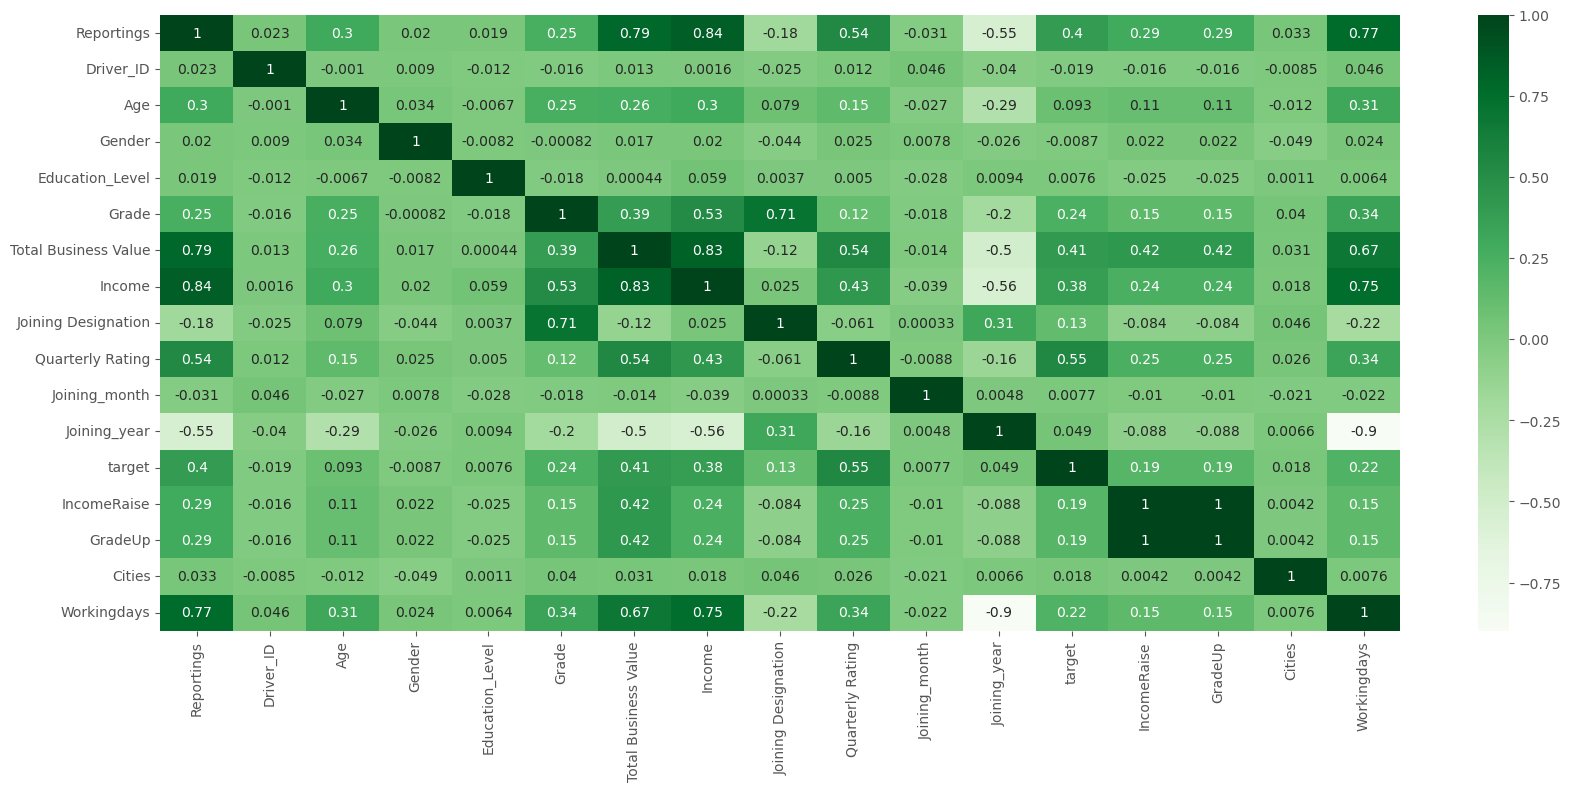

In [63]:
corr = ola1.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

**`INSIGHTS:`**

- Reportings positively correlate with Income, suggesting that more frequent reporting may be linked to higher income.

- Workingdays positively correlate with Age, indicating that older drivers tend to have more working days.

- Grade moderately correlates with Total Business Value, implying that higher grades are associated with greater business value.

- Income positively correlates with Total Business Value, showing that higher income is linked to greater business value.

- Total Business Value positively correlates with Reportings, suggesting that drivers who report more frequently generate more business value.

- Age moderately correlates with Income, indicating that older drivers tend to earn more.

- IncomeRaise and GradeUp are perfectly correlated, meaning drivers who received a raise also experienced a grade increase.

- Workingdays positively correlate with Total Business Value, indicating that drivers with more working days generate more business value.

- Drivers with longer working days tend to report during later periods, indicating a stable employment over time.

- Total Business Value is higher for drivers with more frequent reportings, suggesting consistent performance results in higher business.

- Drivers with higher grades tend to have higher income, reflecting that better performance or senior positions are rewarded financially.

- IncomeRaise and GradeUp's perfect correlation implies that promotions are often accompanied by salary increases.

- Joining Designation and Grade are moderately correlated, indicating that initial job roles are related to current grades.

- Age and GradeUp correlation implies older drivers are more likely to receive promotions.

- Quarterly Rating correlates with Total Business Value, showing that higher ratings align with better business outcomes.

- Drivers from more diverse cities tend to have higher Total Business Value, indicating geographical diversity may contribute to better performance.

- IncomeRaise positively correlates with Reportings, suggesting drivers with higher incomes report more frequently.

- Drivers with more working days have higher Quarterly Ratings, indicating consistent work effort is recognized in performance reviews.

- Gender has minimal impact on key metrics, indicating no significant difference in performance or compensation based on gender.

## `UNIVARIATE ANALYSIS`

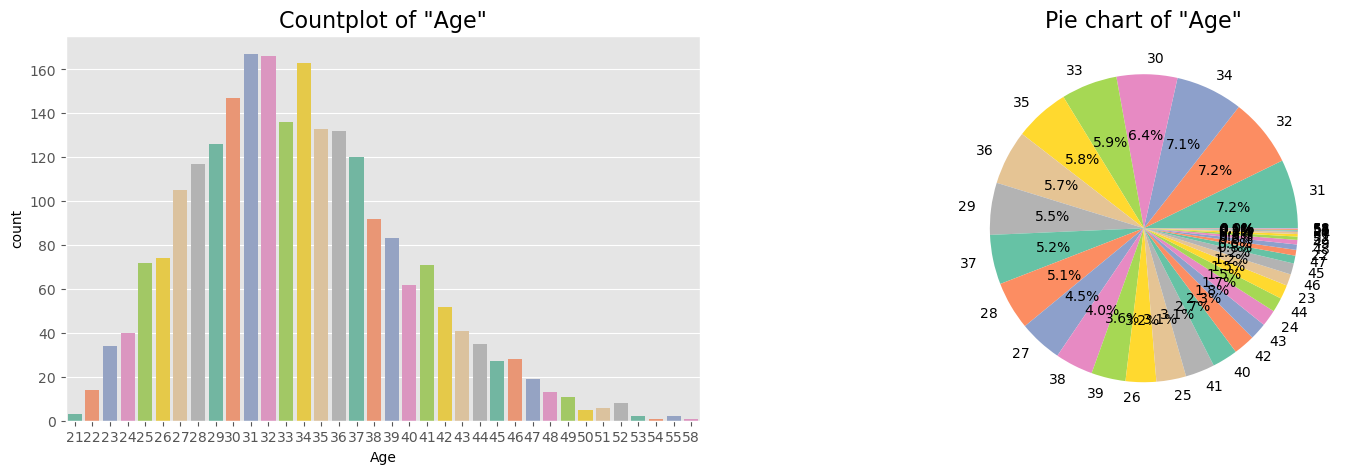

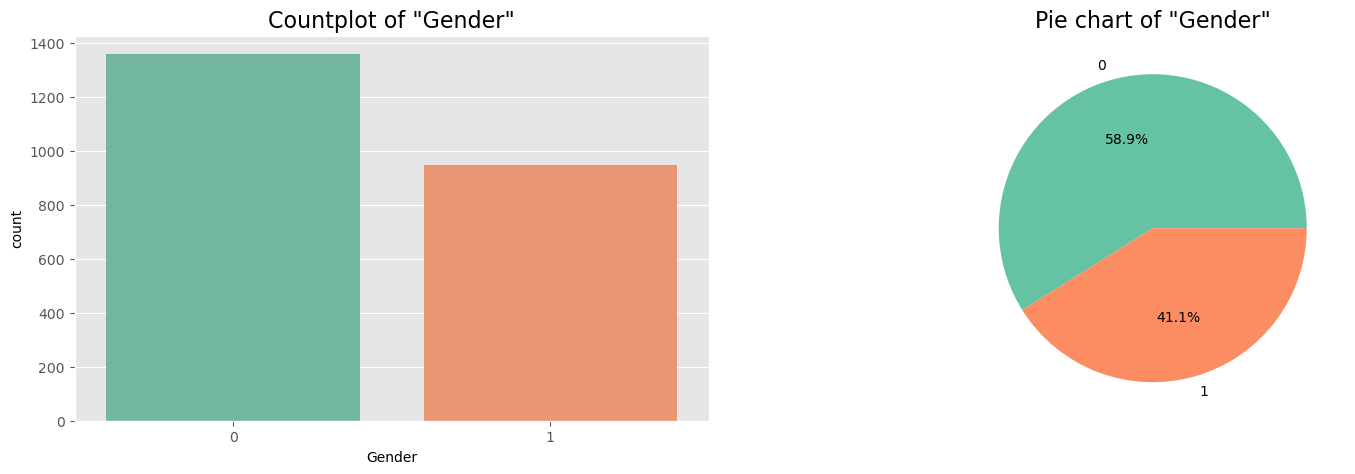

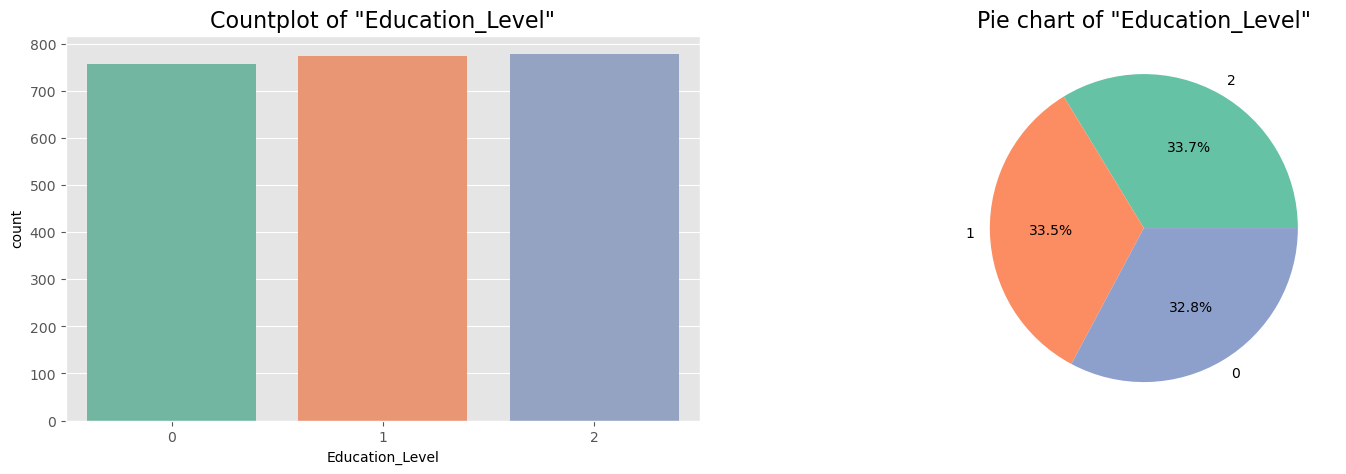

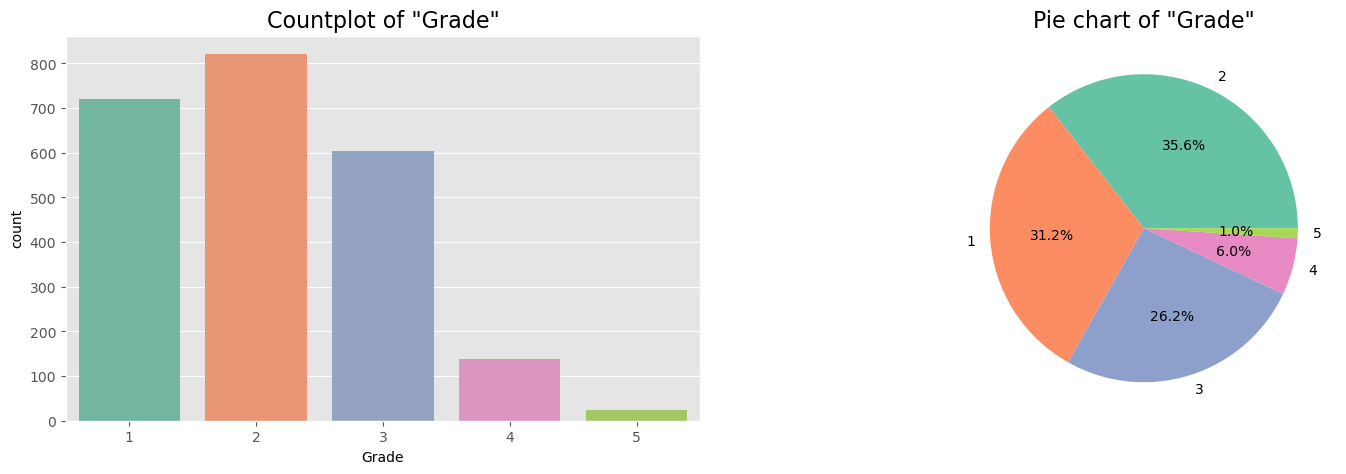

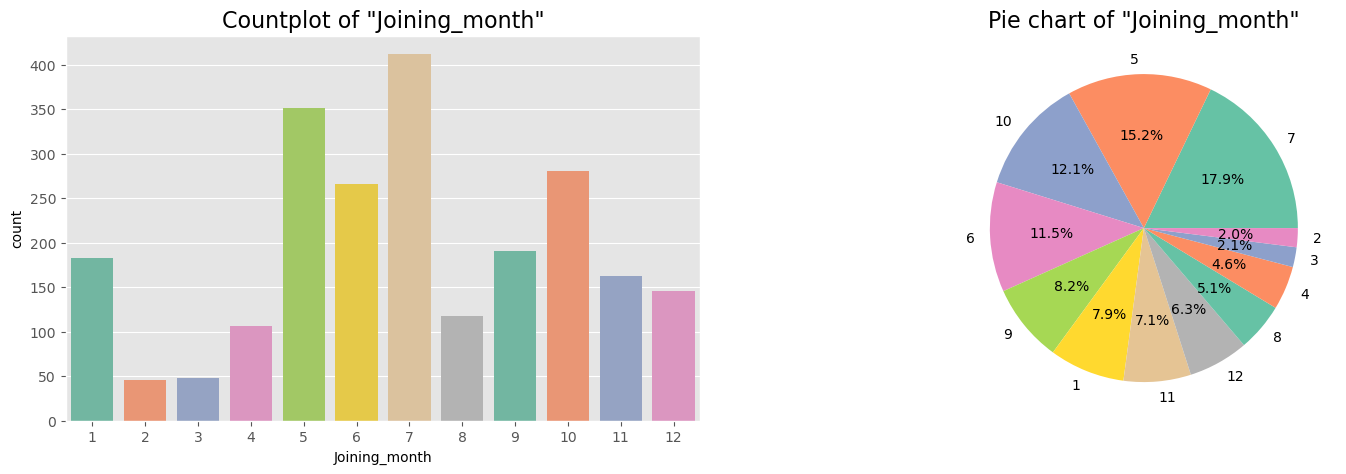

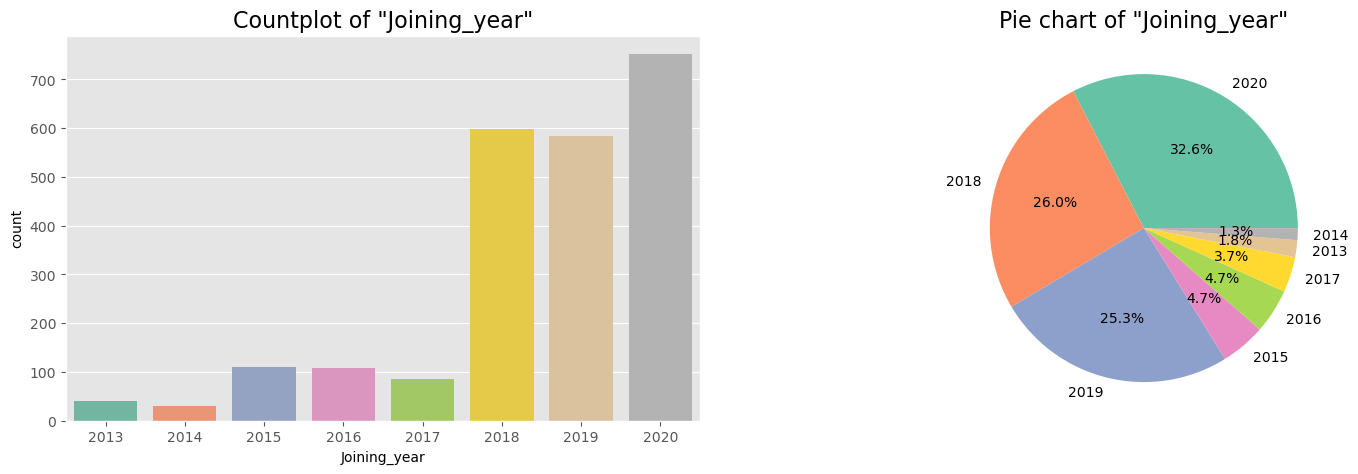

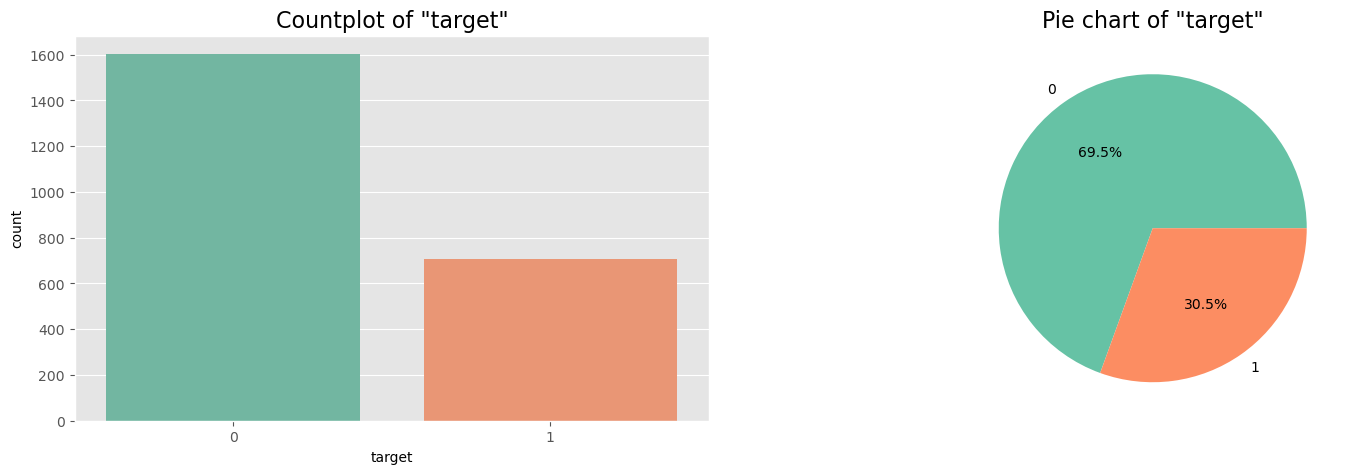

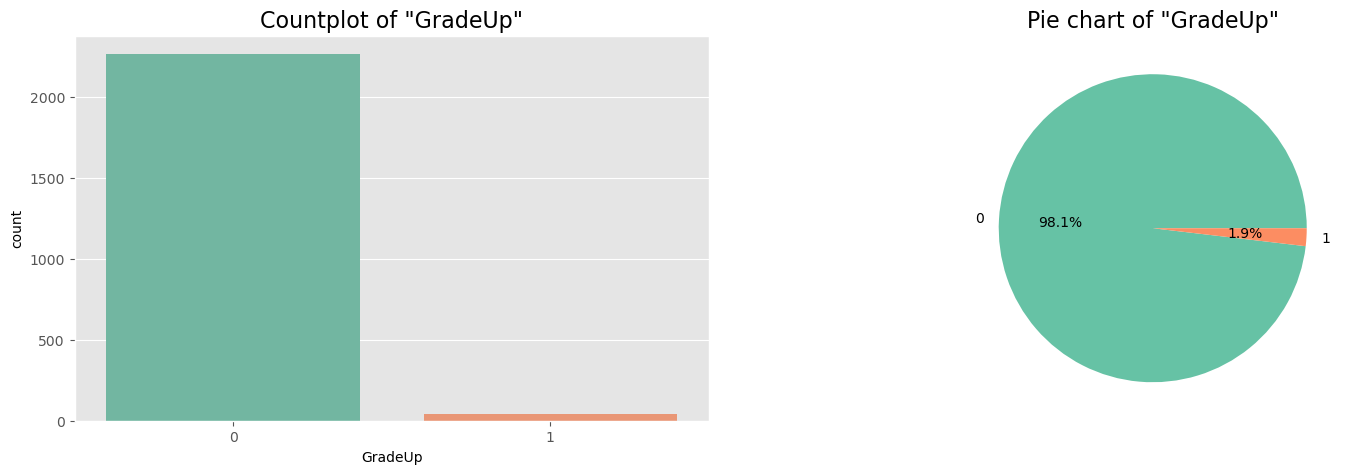

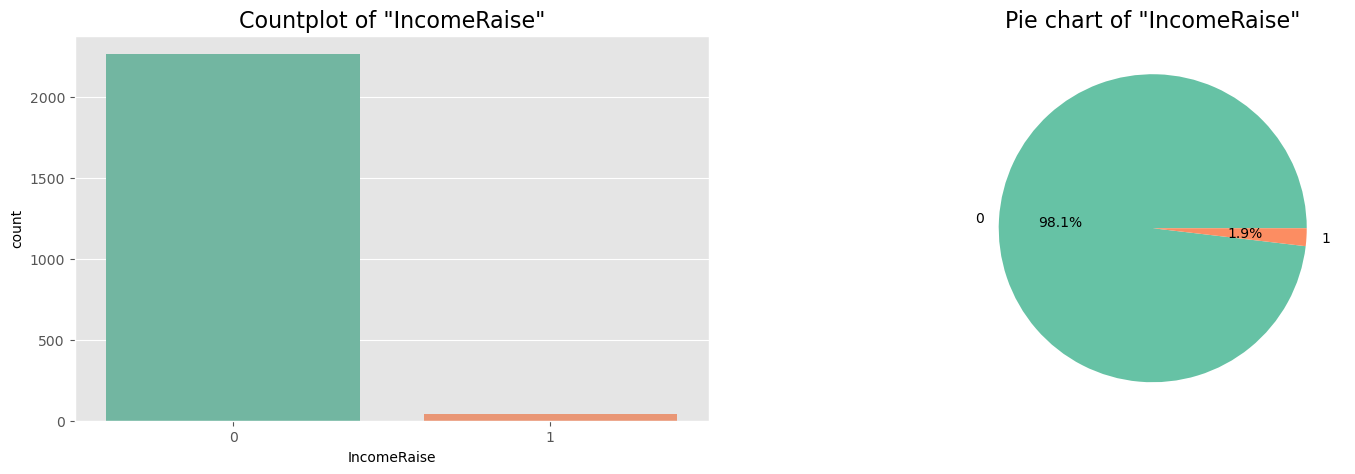

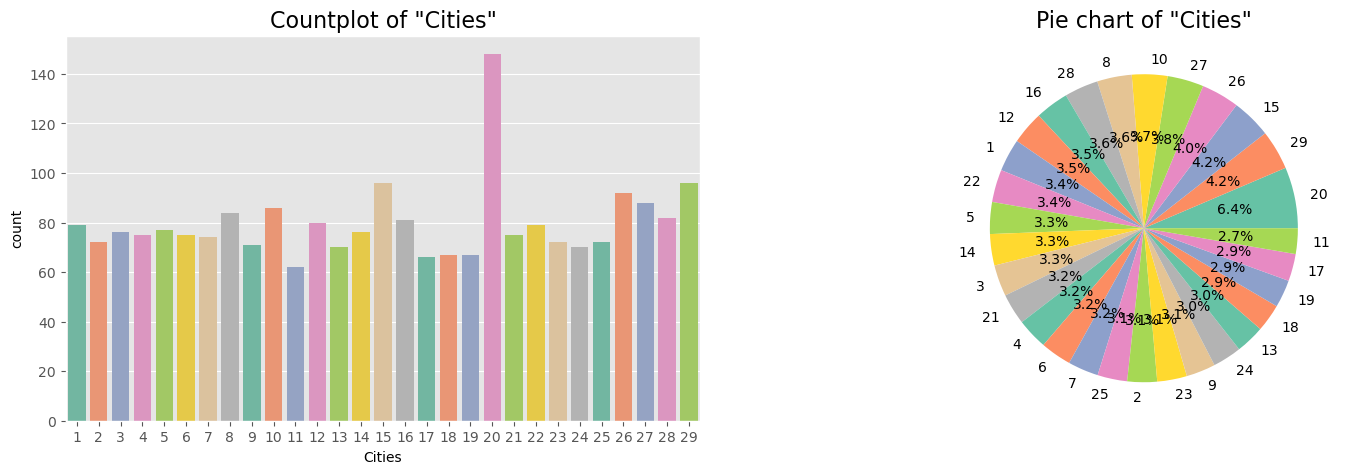

In [64]:
cols = ['Age','Gender','Education_Level','Grade','Joining_month','Joining_year','target','GradeUp','IncomeRaise','Cities']
for i in cols:
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(x=i, data=ola1, palette='Set2')
    plt.title(f'Countplot of "{i}"', fontsize=16)

    plt.subplot(1, 2, 2)
    counts = ola1[i].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Pie chart of "{i}"', fontsize=16)

    plt.show()

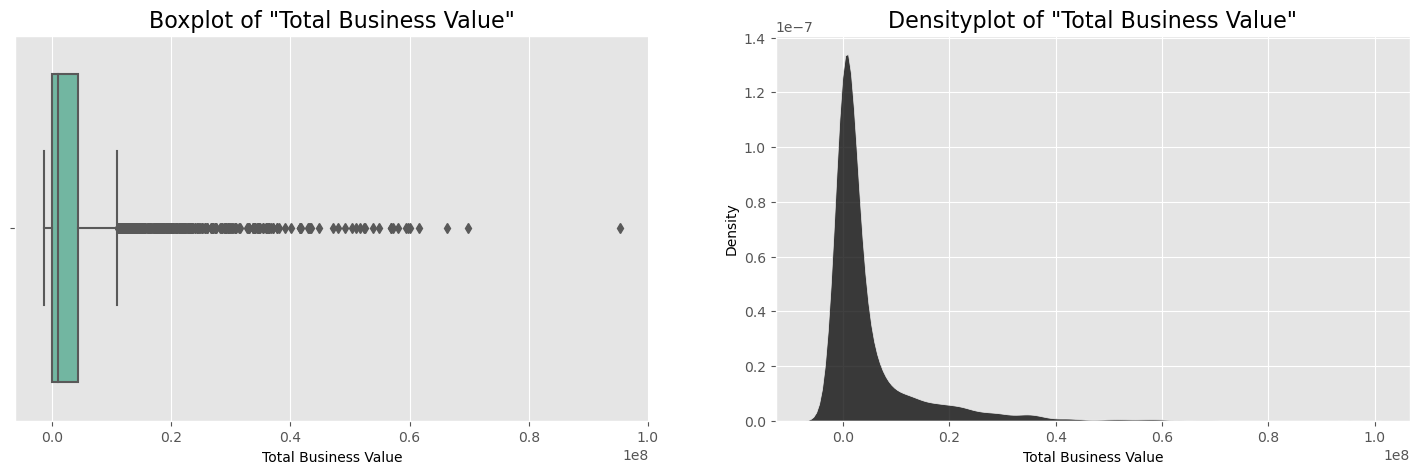

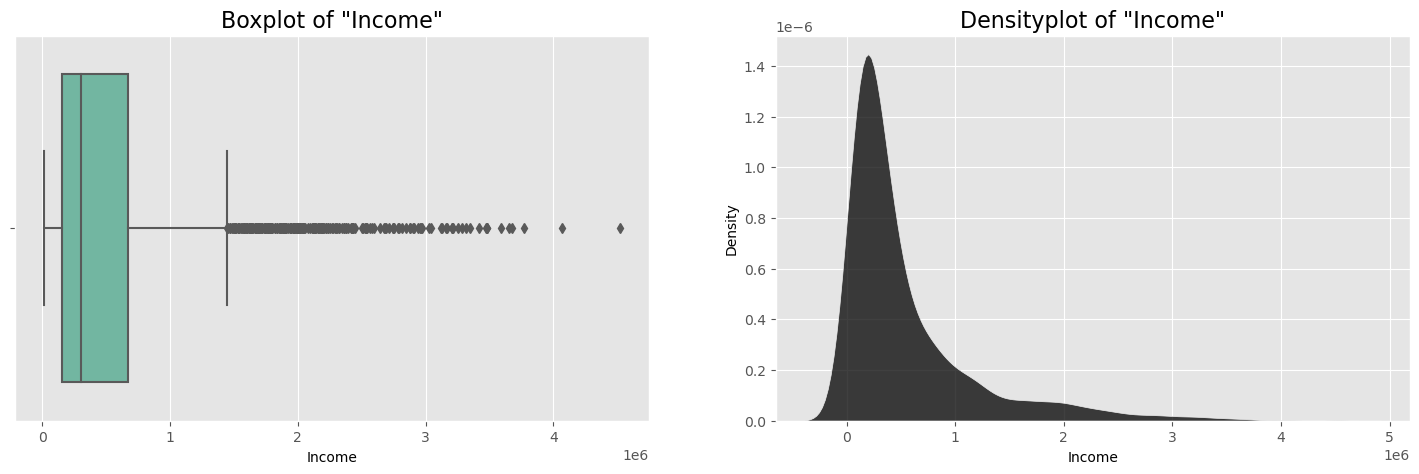

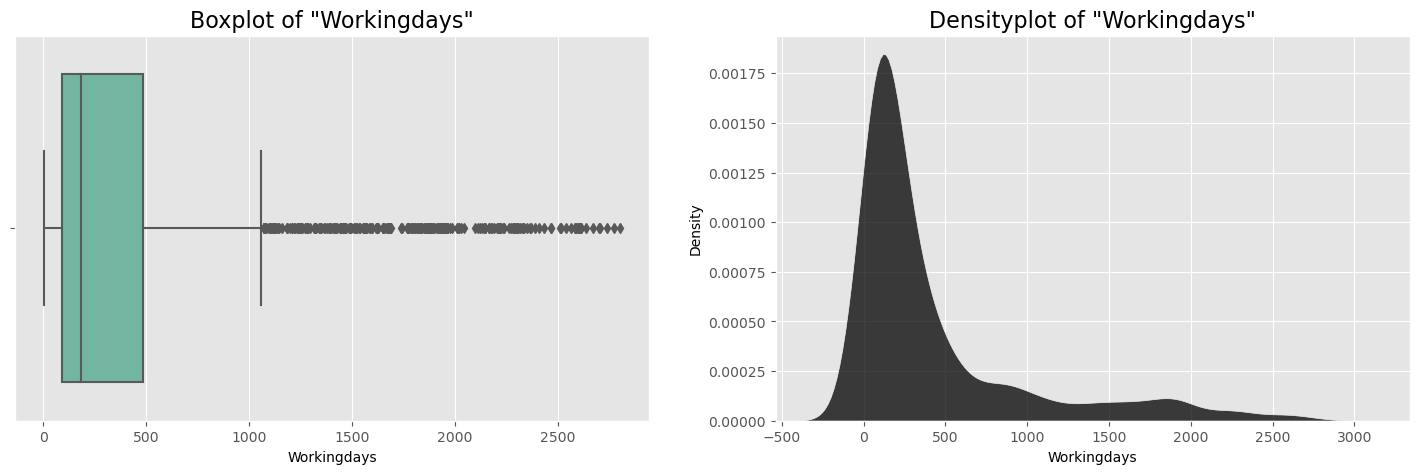

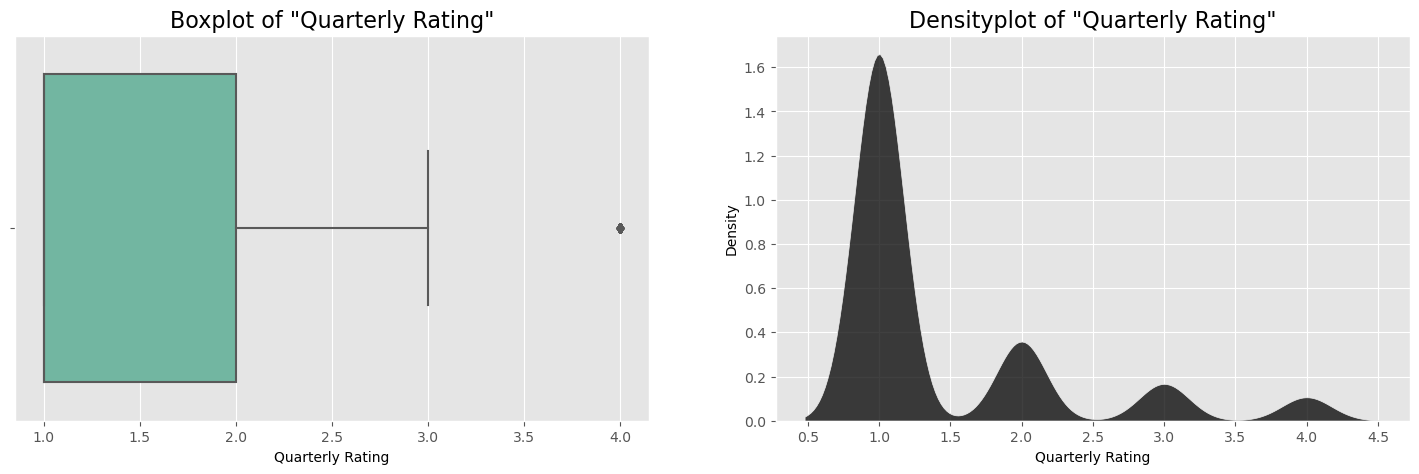

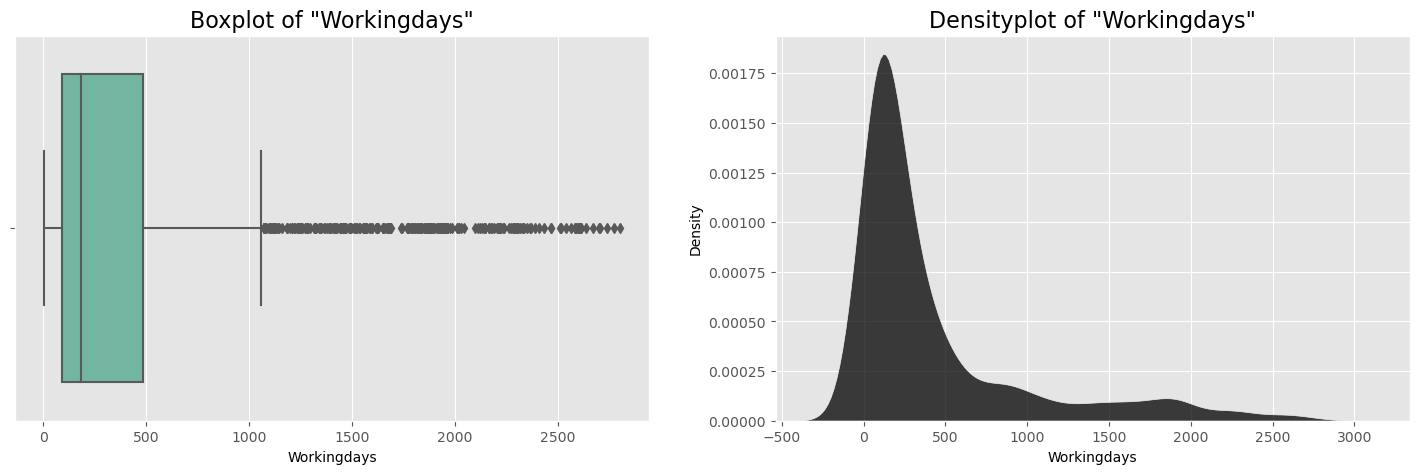

In [65]:
number_cols = ['Total Business Value','Income','Workingdays','Quarterly Rating','Workingdays']
for i in number_cols:
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=ola1[i], palette='Set2')
    plt.title(f'Boxplot of "{i}"', fontsize=16)

    plt.subplot(1, 2, 2)
    sns.kdeplot(x=ola1[i],multiple='stack',color='black')
    plt.title(f'Densityplot of "{i}"', fontsize=16)
    plt.show()

In [66]:
ola1.describe()

Reportings    Driver_ID          Age       Gender  Education_Level  \
count  2308.000000  2308.000000  2308.000000  2308.000000      2308.000000   
mean      8.245667  1400.717071    33.729636     0.410745         1.009099   
std       6.772215   807.631940     6.000480     0.492076         0.815649   
min       1.000000     1.000000    21.000000     0.000000         0.000000   
25%       4.000000   696.750000    29.000000     0.000000         0.000000   
50%       6.000000  1405.500000    33.000000     0.000000         1.000000   
75%      11.000000  2105.250000    37.000000     1.000000         2.000000   
max      24.000000  2788.000000    58.000000     1.000000         2.000000   

             Grade  Total Business Value        Income  Joining Designation  \
count  2308.000000          2.308000e+03  2.308000e+03          2308.000000   
mean      2.100087          4.731669e+06  5.416694e+05             1.814991   
std       0.947215          9.233354e+06  6.271783e+05             0.844165   
min       1.000000         -1.385530e+06  1.088300e+04             1.000000   
25%       1.000000          0.000000e+00  1.521565e+05             1.000000   
50%       2.000000          9.351550e+05  3.022945e+05             2.000000   
75%       3.000000          4.417940e+06  6.707288e+05             2.000000   
max       5.000000          9.533106e+07  4.522032e+06             5.000000   

       Quarterly Rating  Joining_month  Joining_year       target  \
count       2308.000000    2308.000000   2308.000000  2308.000000   
mean           1.441075       6.962305   2018.493068     0.305459   
std            0.818878       3.001352      1.615230     0.460701   
min            1.000000       1.000000   2013.000000     0.000000   
25%            1.000000       5.000000   2018.000000     0.000000   
50%            1.000000       7.000000   2019.000000     0.000000   
75%            2.000000      10.000000   2020.000000     1.000000   
max            4.000000      12.000000   2020.000000     1.000000   

       IncomeRaise      GradeUp       Cities  Workingdays  
count  2308.000000  2308.000000  2308.000000  2308.000000  
mean      0.018631     0.018631    15.374783   430.887348  
std       0.135247     0.135247     8.405491   568.648880  
min       0.000000     0.000000     1.000000     1.000000  
25%       0.000000     0.000000     8.000000    91.000000  
50%       0.000000     0.000000    16.000000   182.500000  
75%       0.000000     0.000000    22.000000   482.000000  
max       1.000000     1.000000    29.000000  2801.000000

# `DATA ANALYTICS`

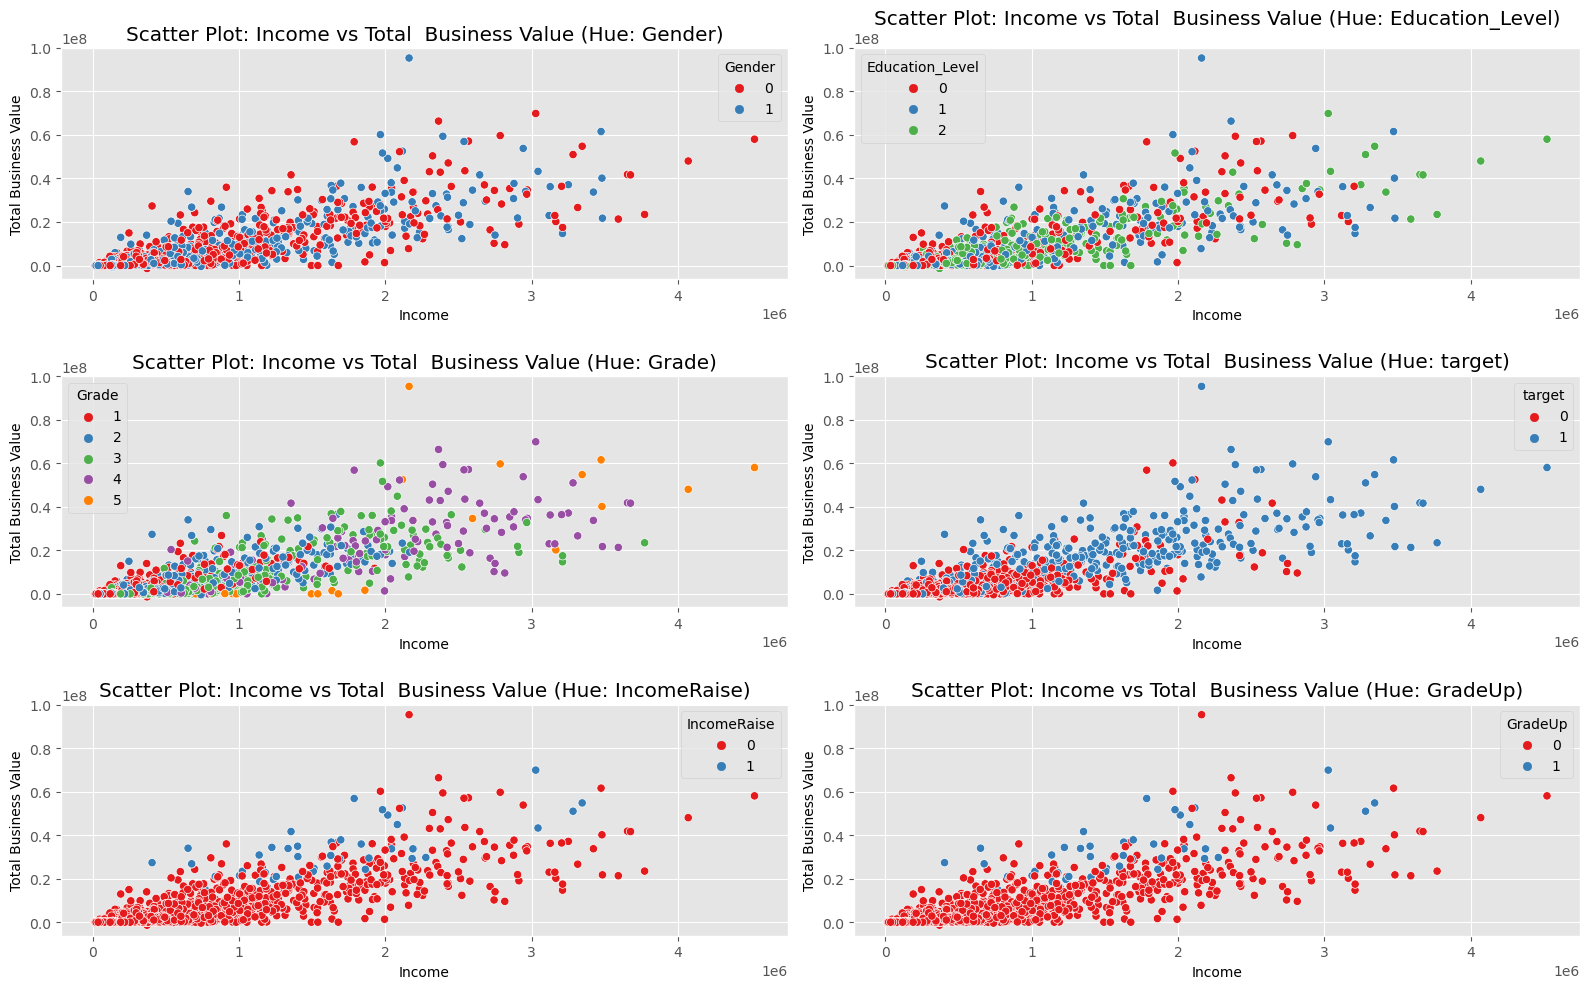

In [127]:
cols = ['Gender', 'Education_Level', 'Grade', 'target', 'IncomeRaise', 'GradeUp']
plt.figure(figsize=(16, 10))
for idx, col in enumerate(cols, start=1):
    plt.subplot(3, 2, idx)     
    sns.scatterplot(x='Income', y='Total Business Value', data=ola1, hue=ola1[col],palette='Set1')
    plt.title(f'Scatter Plot: Income vs Total  Business Value (Hue: {col})')
    plt.xlabel('Income')
    plt.ylabel('Total Business Value')
    plt.legend(title=col)

plt.tight_layout()  
plt.show()

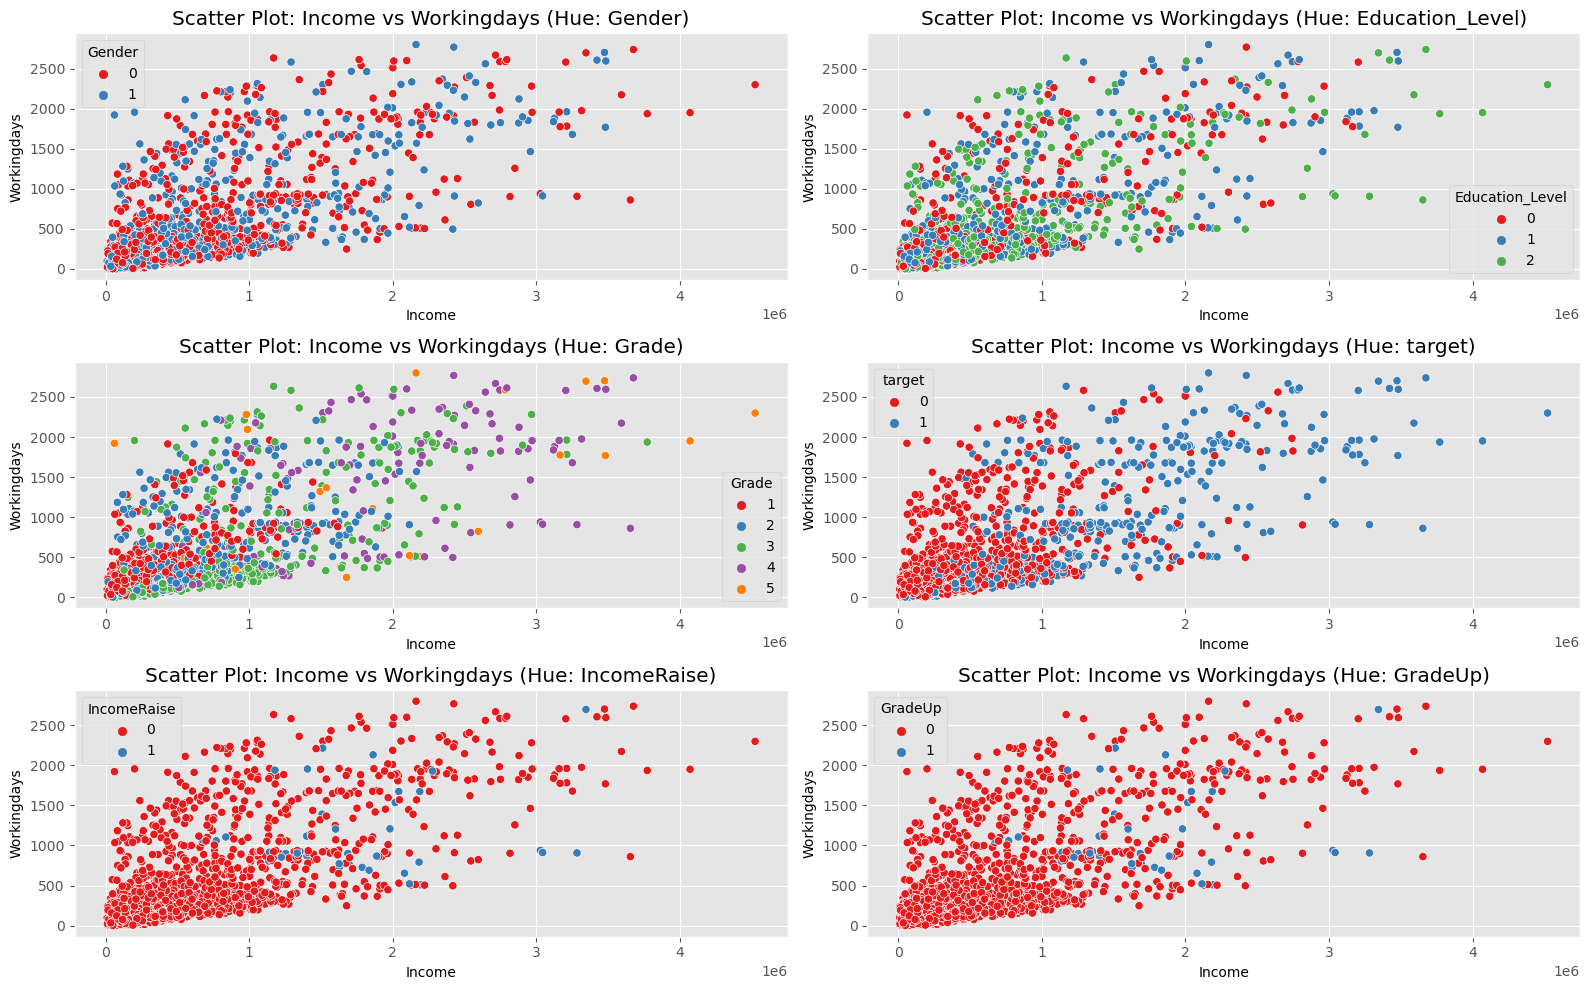

In [70]:
cols = ['Gender', 'Education_Level', 'Grade', 'target', 'IncomeRaise', 'GradeUp']
plt.figure(figsize=(16, 10))
for idx, col in enumerate(cols, start=1):
    plt.subplot(3, 2, idx)     
    sns.scatterplot(x='Income', y='Workingdays', data=ola1, hue=ola1[col],palette='Set1')
    plt.title(f'Scatter Plot: Income vs Workingdays (Hue: {col})')
    plt.xlabel('Income')
    plt.ylabel('Workingdays')
    plt.legend(title=col)

plt.tight_layout()  
plt.show()

**`INSIGHTS:`**

- There is a notable correlation between Income and Workingdays, as observed in the scatterplot showing a positive trend between these variables.
- Higher levels of Education (Level 2) are associated with drivers who have both higher Workingdays and Income.
- Drivers who remain with the company typically have varying ranges of working days but generally not very high incomes. 
- Drivers with higher Workingdays and Income tend to have higher Grades, indicating a positive correlation between these factors.
- Drivers who have churned (left) exhibit a trend towards higher Income and Education levels compared to those who have not churned.
- Interestingly, drivers who received IncomeRaise also tend to show GradeUp, suggesting a potential link between income increments and grade improvements.

**`OBSERVATION:`**

The data reveals drivers with higher income tend to work more, and higher education correlates with increased income and working days. Those who left had higher incomes and education levels compared to those who stayed. Income raises often coincide with grade improvements.

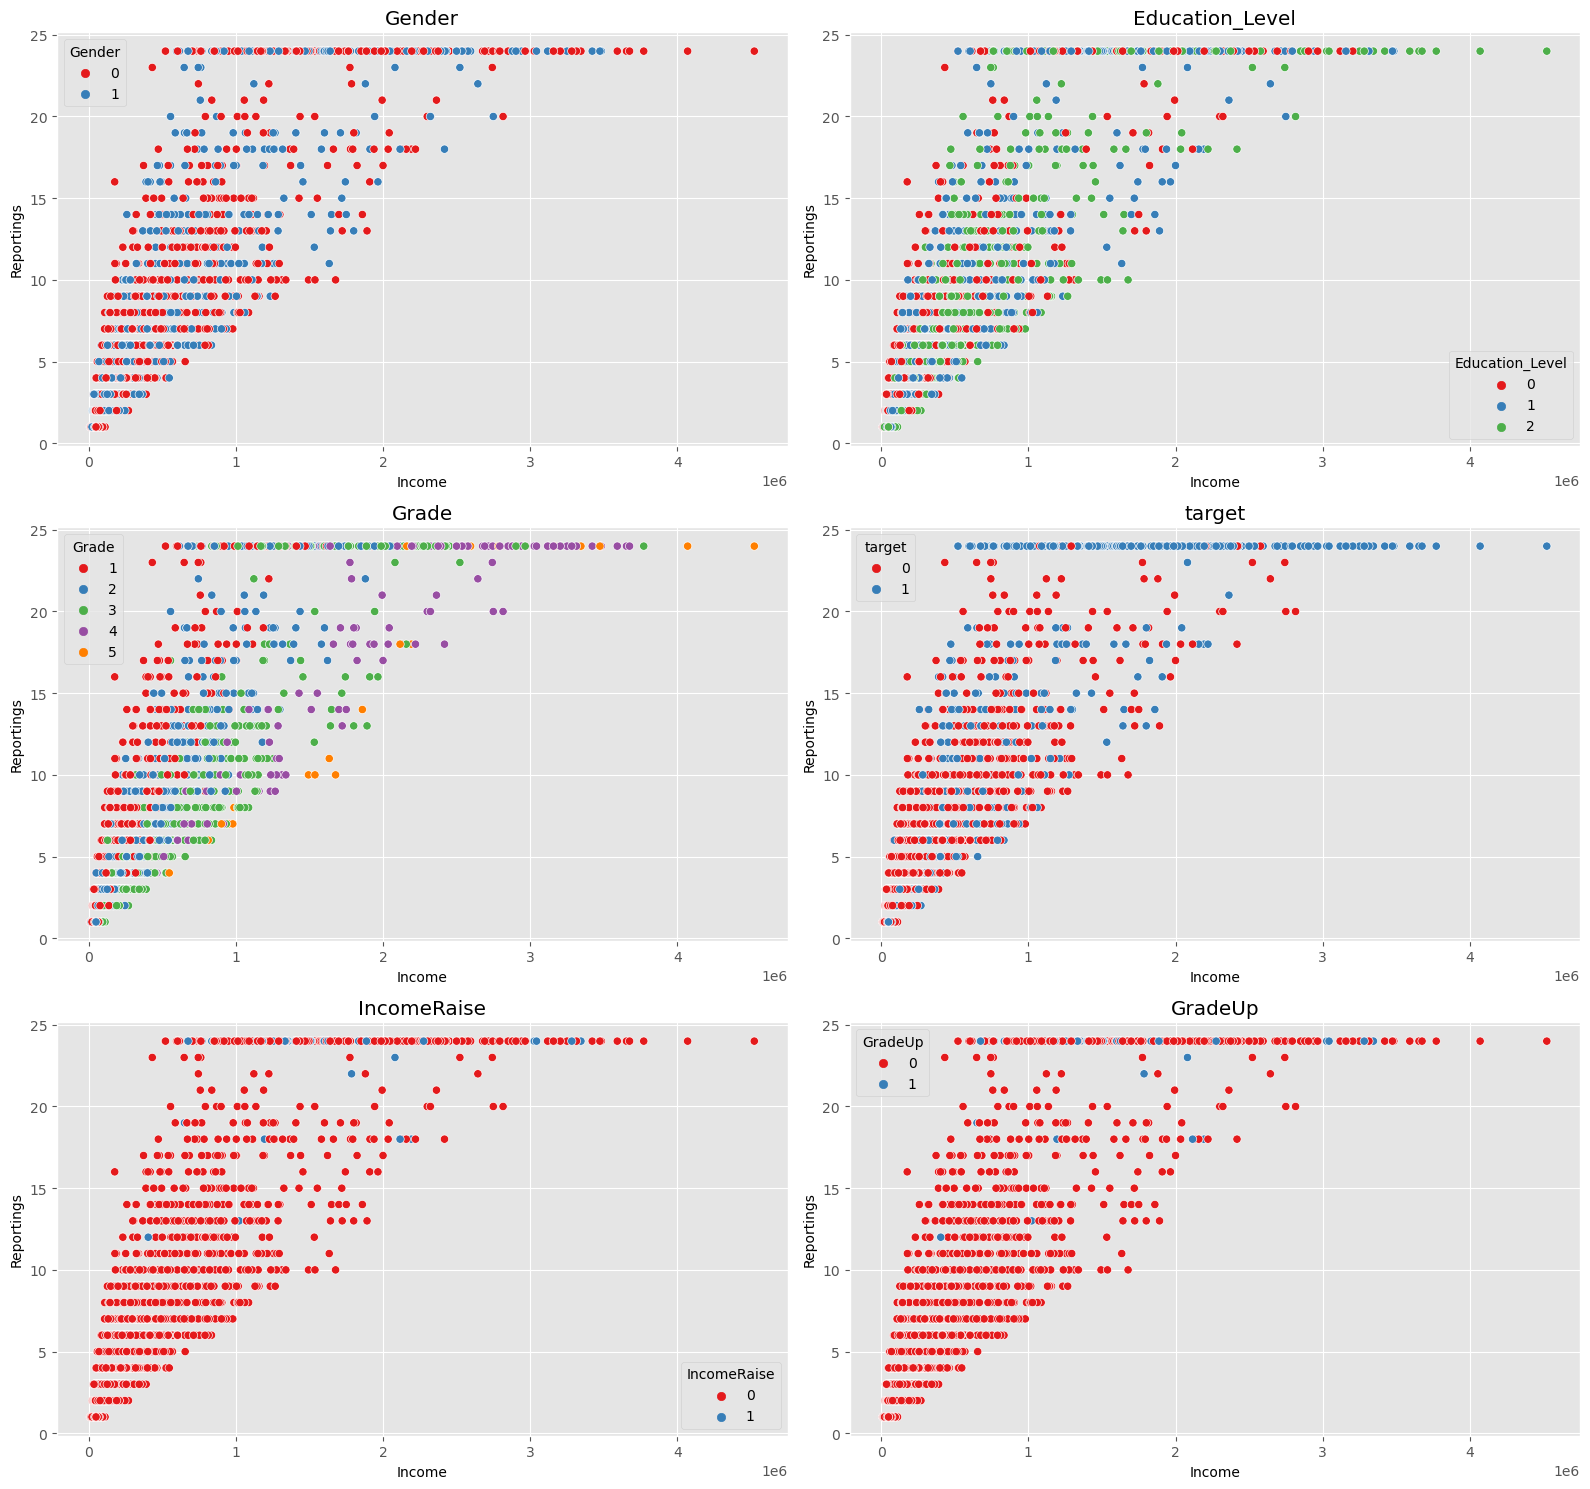

In [71]:
cols = ['Gender','Education_Level','Grade','target','IncomeRaise','GradeUp']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))
axes = axes.flatten()  # Flatten the 3x2 array to a 1D array for easier iteration

# Iterate over columns and axes to create the strip plots
for i, ax in enumerate(axes):
    if i < len(cols):  # Check to avoid IndexError if cols has fewer elements than axes
        sns.scatterplot(x='Income', y='Reportings', data=ola1, hue=ola1[cols[i]], palette='Set1', ax=ax)
        ax.set_title(cols[i])

# Adjust layout
plt.tight_layout()
plt.show()

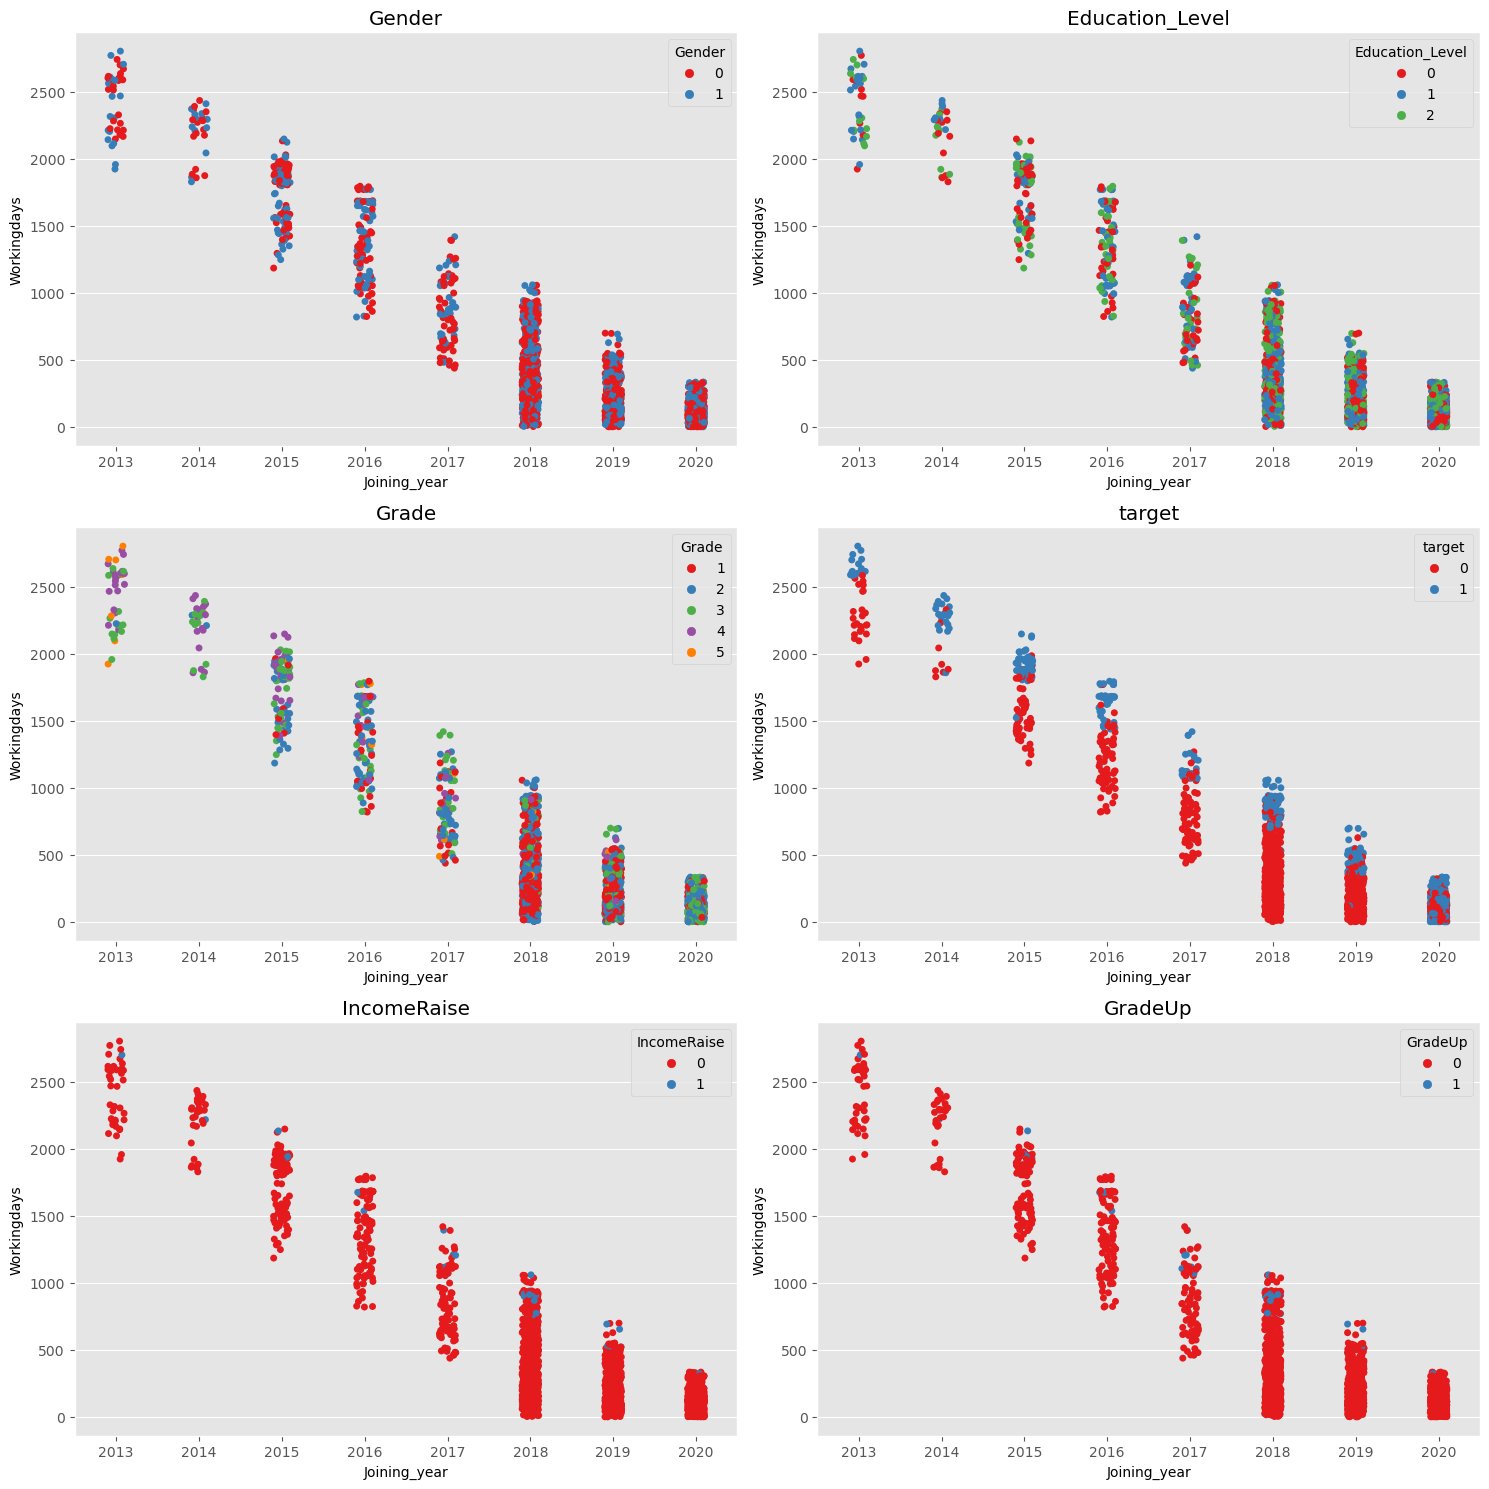

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten() 
for i, ax in enumerate(axes):
    if i < len(cols): 
        sns.stripplot(x='Joining_year', y='Workingdays', data=ola1, hue=ola1[cols[i]], palette='Set1', ax=ax)
        ax.set_title(cols[i])
plt.tight_layout()
plt.show()

**`INSIGHTS:`**

- A correlation of -0.9 between working days and joining year suggests a strong negative linear relationship. This means that as the number of working days increases, the year of joining tends to decrease (or vice versa) either Drivers who joined more recently tend to have fewer working days or Drivers who have been with the company longer tend to have accumulated more working days.
- There is a general trend of increasing counts as we move from earlier years (2013, 2014) to more recent years (2018, 2019, 2020). This suggests that the number of drivers joining has increased over time.
- Across each year, there is a higher count of drivers who are male (denoted by 0) compared to female drivers (denoted by 1). This holds true across all years shown in the data.
- There is a significant increase in drivers with Education_Level 2 (graduate level) from 2013 to 2020, indicating a shift towards hiring more educated drivers although the increase in drivers with Education_Level 2 is more pronounced in recent years (2019-2020)
- The number of drivers in higher grades (Grade 3, 4, 5) has generally increased from 2013 to 2020, indicating potential improvements in driver performance or promotions over time whereas here is a noticeable increase in drivers in Grade 1 and Grade 2 from 2018 to 2020, suggesting a growing workforce or strategic changes in grading criteria.
- The number of drivers who are churning has shown a steady increase from 2013 to 2020, indicating a rising trend in driver attrition over the years.
- In 2018 and 2019, there was a significant increase in churned drivers (Target 1), suggesting potential issues or challenges in retention during those years.
- The year 2020 saw an equal distribution between churned drivers (Target 1) and drivers who did not churn (Target 0), possibly indicating stabilization in churn rates or a balanced approach in addressing retention.

**`OBSERVATIONS:`**

The data analysis reveals clear patterns: a strong negative correlation of -0.9 between working days and joining year indicates newer drivers have fewer working days, suggesting turnover or shorter tenure. The number of drivers has steadily increased from earlier years to recent ones, likely due to expanded recruitment efforts. Male drivers consistently outnumber females, indicating a gender disparity. There's also a noticeable trend towards hiring more educated drivers, especially those with graduate-level qualifications in recent years. These insights highlight evolving workforce dynamics and recruitment strategies within the organization.

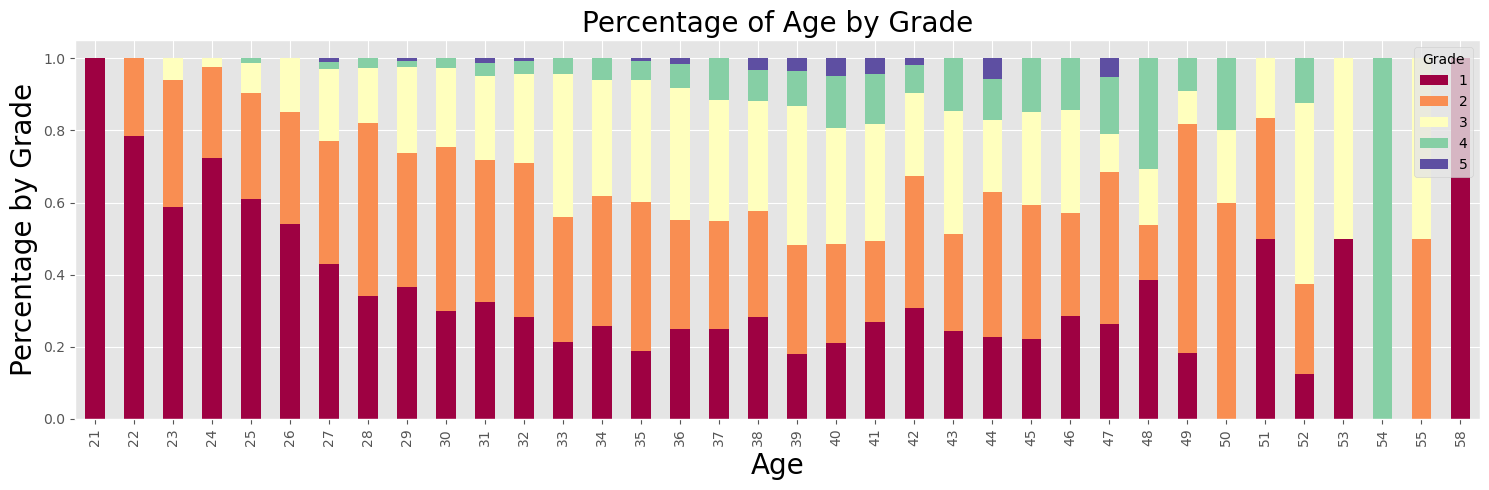

In [73]:
age_grade = pd.crosstab(ola1['Age'], ola1['Grade'])
age_grade_pct = age_grade.div(age_grade.sum(axis=1), axis=0)
plt.figure(figsize=(15, 5))
ax = plt.gca()
age_grade_pct.plot(kind='bar', stacked=True, colormap='Spectral', ax=ax)
plt.title('Percentage of Age by Grade',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Percentage by Grade',fontsize=20)
plt.legend(title='Grade', loc='upper right')
plt.tight_layout()
plt.show()

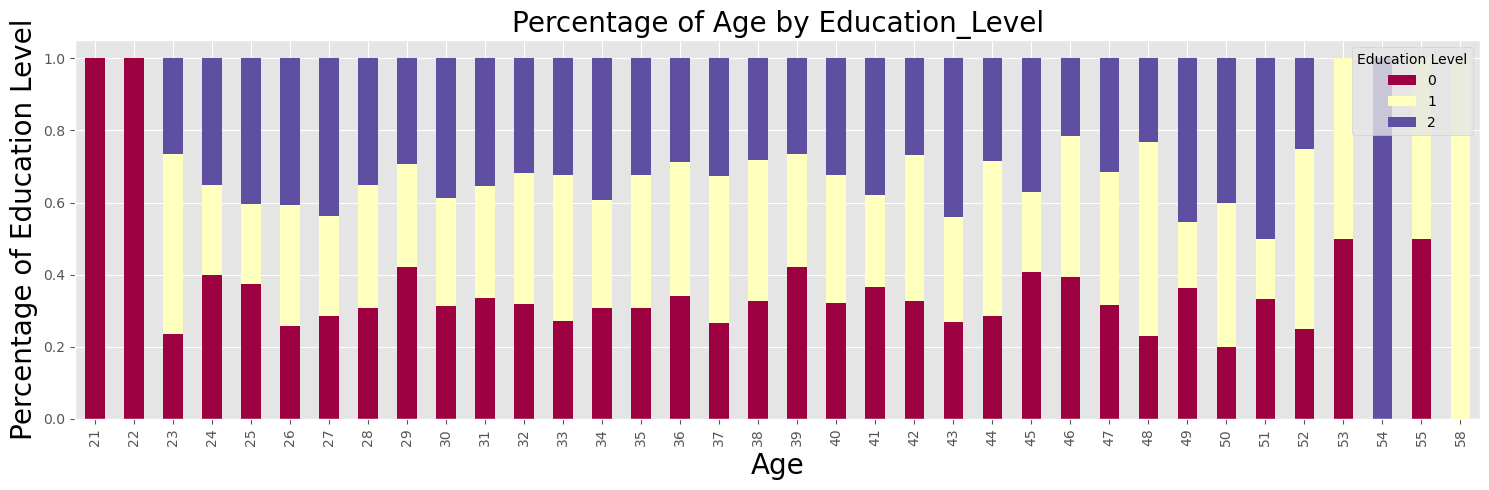

In [74]:
age_edu = pd.crosstab(ola1['Age'], ola1['Education_Level'])
age_edu_pct = age_edu.div(age_grade.sum(axis=1), axis=0)
plt.figure(figsize=(15, 5))
ax = plt.gca()
age_edu_pct.plot(kind='bar', stacked=True, colormap='Spectral', ax=ax)
plt.title('Percentage of Age by Education_Level',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Percentage of Education Level',fontsize=20)
plt.legend(title='Education Level', loc='upper right')
plt.tight_layout()
plt.show()

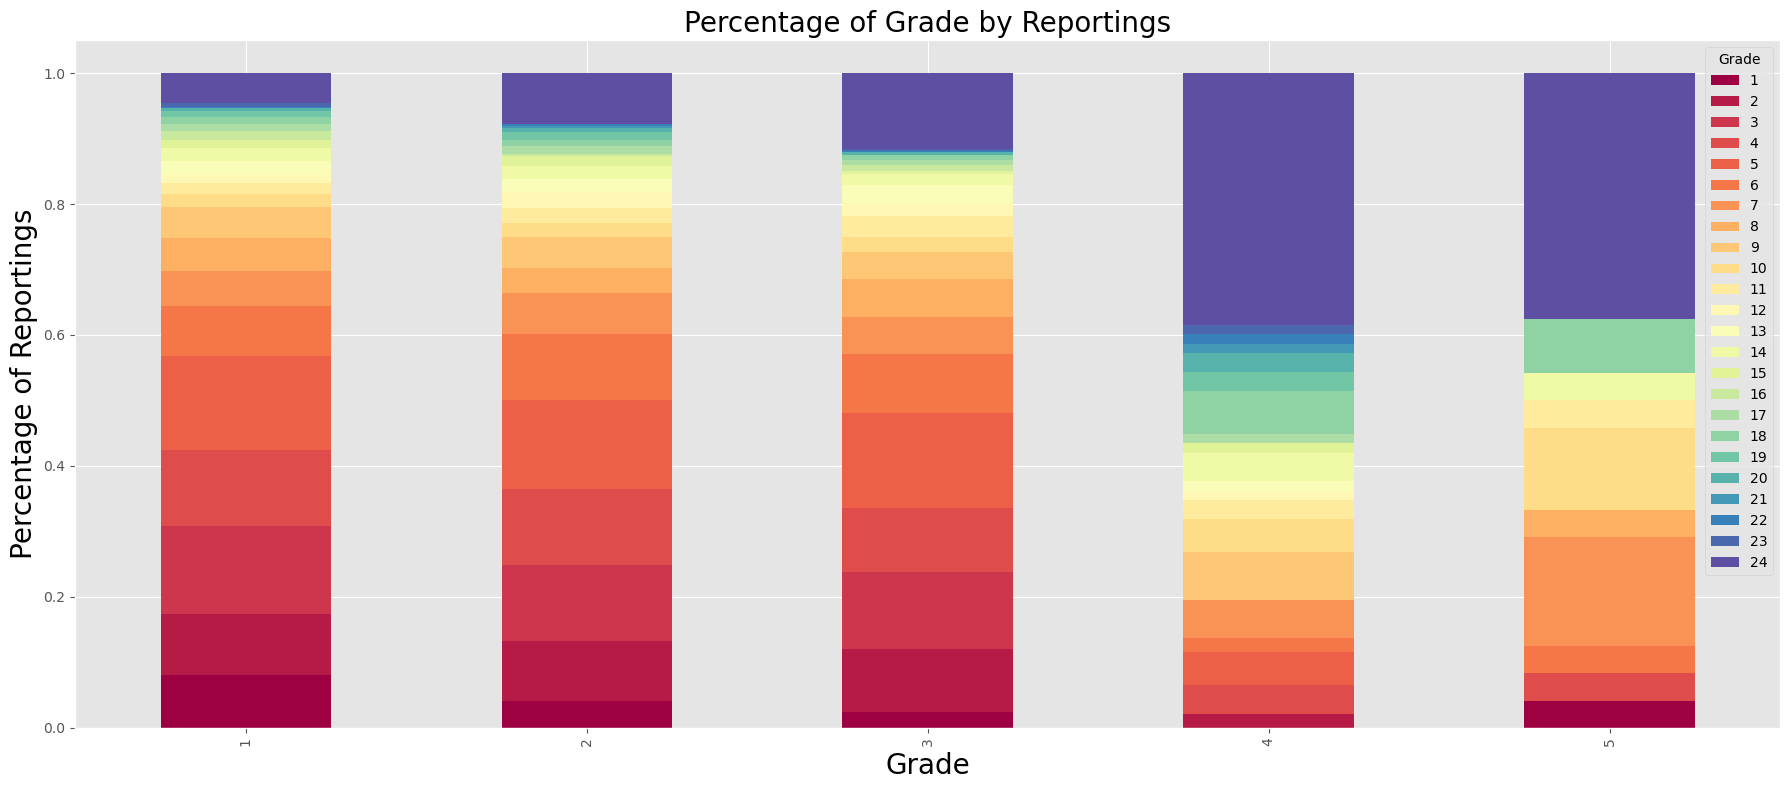

In [75]:
grade_report = pd.crosstab(ola1['Grade'], ola1['Reportings'])
grade_report_pct = grade_report.div(grade_report.sum(axis=1), axis=0)
plt.figure(figsize=(18, 8))
ax = plt.gca()
grade_report_pct.plot(kind='bar', stacked=True, colormap='Spectral', ax=ax)
plt.title('Percentage of Grade by Reportings',fontsize=20)
plt.xlabel('Grade',fontsize=20)
plt.ylabel('Percentage of Reportings',fontsize=20)
plt.legend(title='Grade', loc='upper right')

plt.tight_layout()
plt.show()

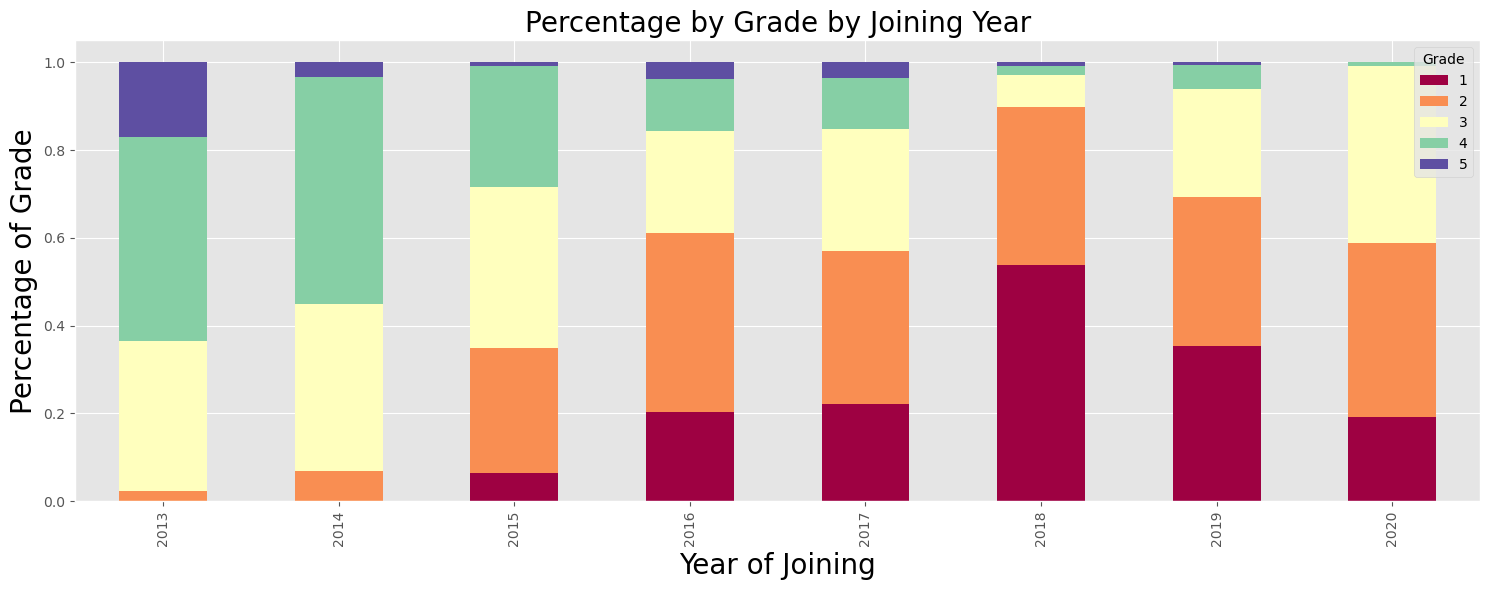

In [149]:
joining_grade = pd.crosstab(ola1['Joining_year'], ola1['Grade'])
joining_grade_pct = joining_grade.div(joining_grade.sum(axis=1), axis=0)
plt.figure(figsize=(15, 6))
ax = plt.gca()
joining_grade_pct.plot(kind='bar', stacked=True, colormap='Spectral', ax=ax)
plt.title('Percentage by Grade by Joining Year',fontsize=20)
plt.xlabel('Year of Joining',fontsize=20)
plt.ylabel('Percentage of Grade',fontsize=20)
plt.legend(title='Grade', loc='upper right')

plt.tight_layout()
plt.show()

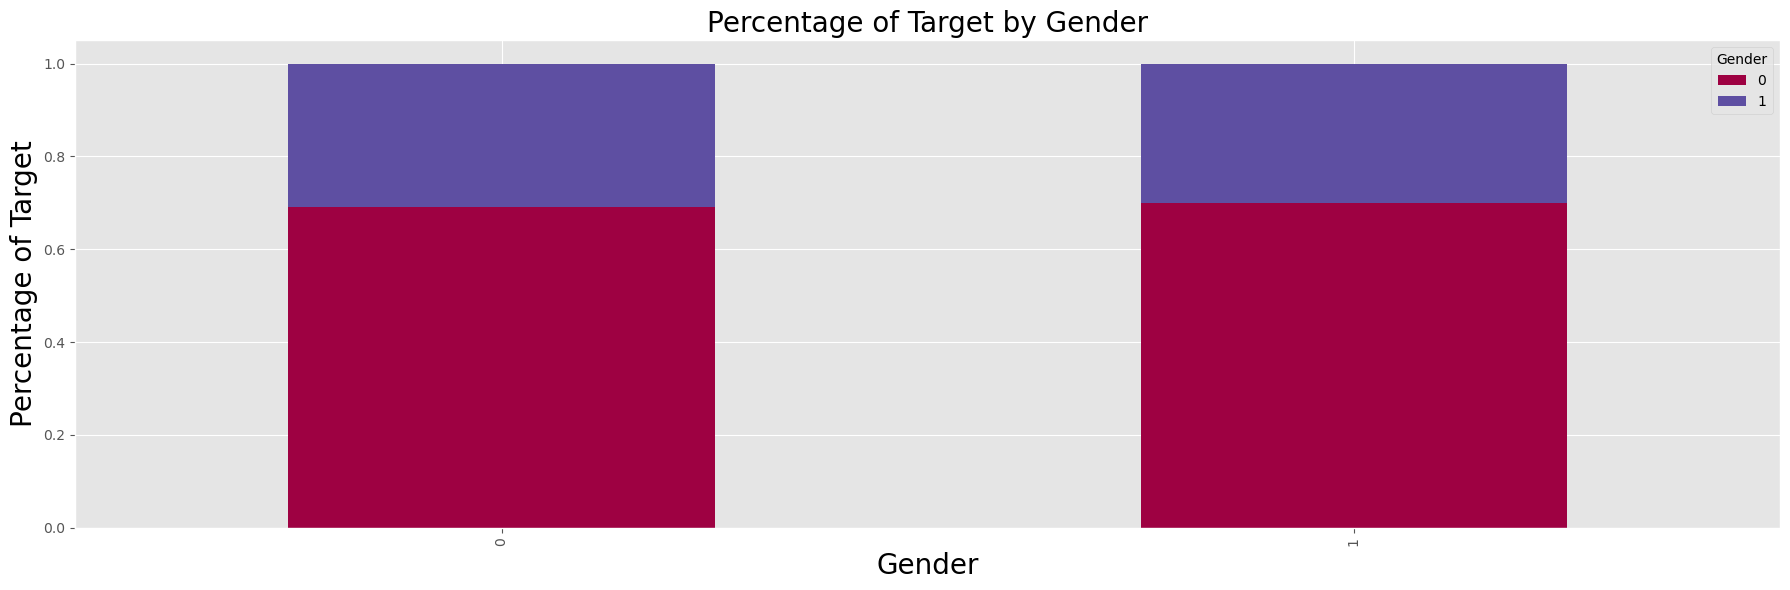

In [77]:
gender_report = pd.crosstab(ola1['Gender'], ola1['target'])
gender_report_pct = gender_report.div(gender_report.sum(axis=1), axis=0)
plt.figure(figsize=(18, 6))
ax = plt.gca()
gender_report_pct.plot(kind='bar', stacked=True, colormap='Spectral', ax=ax)
plt.title('Percentage of Target by Gender',fontsize=20)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Percentage of Target',fontsize=20)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

**`Age and Grade`**
- Drivers aged 25 to 35 (especially 27 to 32) dominate higher grades (3, 4, 5), indicating that these age groups are more likely to attain senior positions.
- Younger drivers, particularly those aged 21 to 24, predominantly occupy lower grades (1, 2), suggesting they are more commonly in junior roles.

**`Age and Education`**
- Drivers aged 27 to 35 generally show a higher concentration in Education_Level 2 (graduate level), suggesting that this age group tends to have higher educational qualifications.
- Younger drivers, particularly those aged 21 to 26, are predominantly represented in Education_Level 0 (10+ or below graduate level), indicating a trend towards hiring less educated individuals in junior roles.
- There is an overall trend of increasing counts in Education_Level 1 (12+) and Education_Level 2 (graduate) from age 27 onwards, indicating a pattern of educational attainment as drivers progress in age.

**`Grade and Reportings`**
- Grade 2 (middle management) has the highest counts across various reporting periods, indicating a significant presence in the workforce.
- here is a trend of decreasing counts as we move from lower grades (1 and 2) to higher grades (3, 4, and 5), suggesting a hierarchical structure with fewer individuals in senior roles.
- Grade 5 (senior management) has relatively low counts across all reporting periods, suggesting a limited number of individuals in top leadership roles within the organization.

**`Joining year and grad`**
- Joining years 2018 and 2019 saw significant increases in drivers in Grades 1 and 2, suggesting a growing workforce or strategic changes in grading criteria during those years.
- Grade 5 shows generally low counts across all years, indicating a limited number of individuals in top leadership roles within the organization.

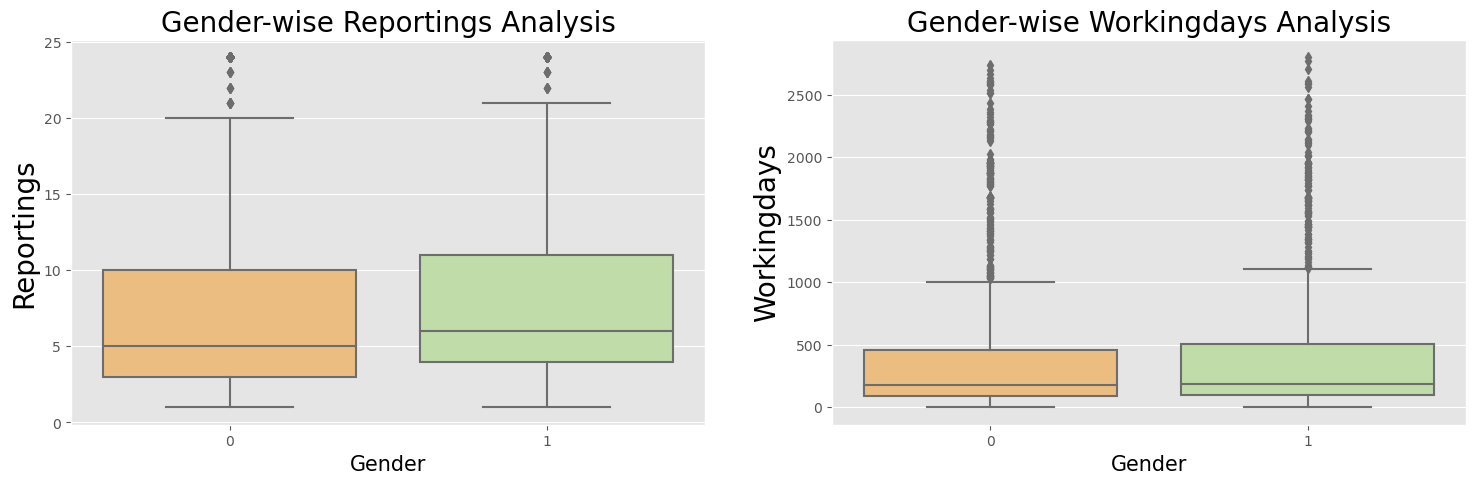

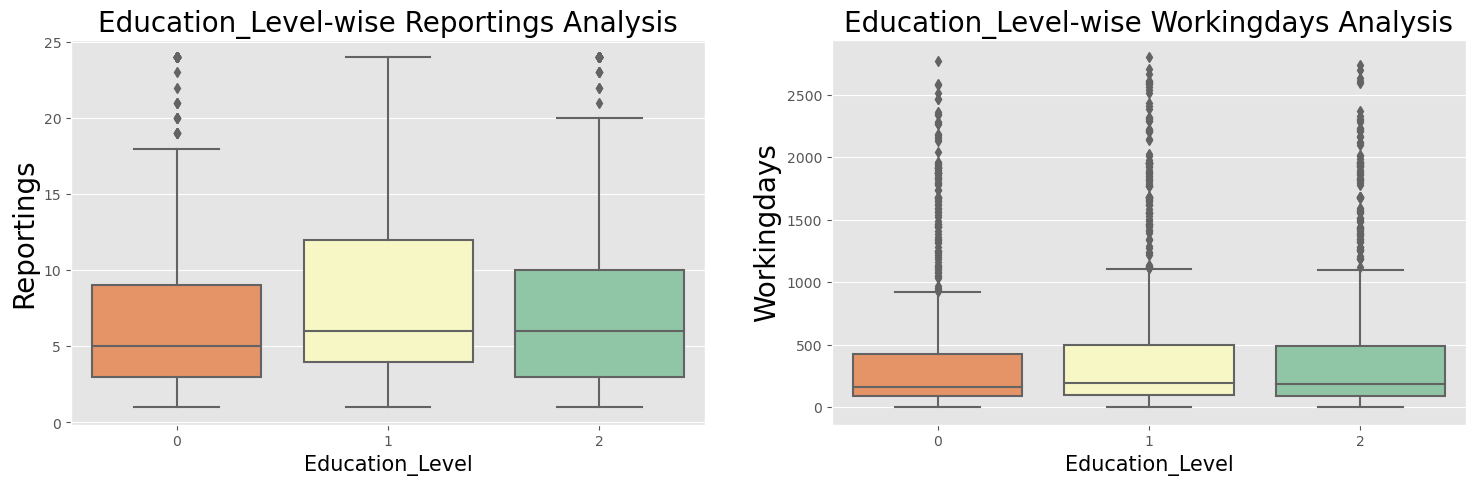

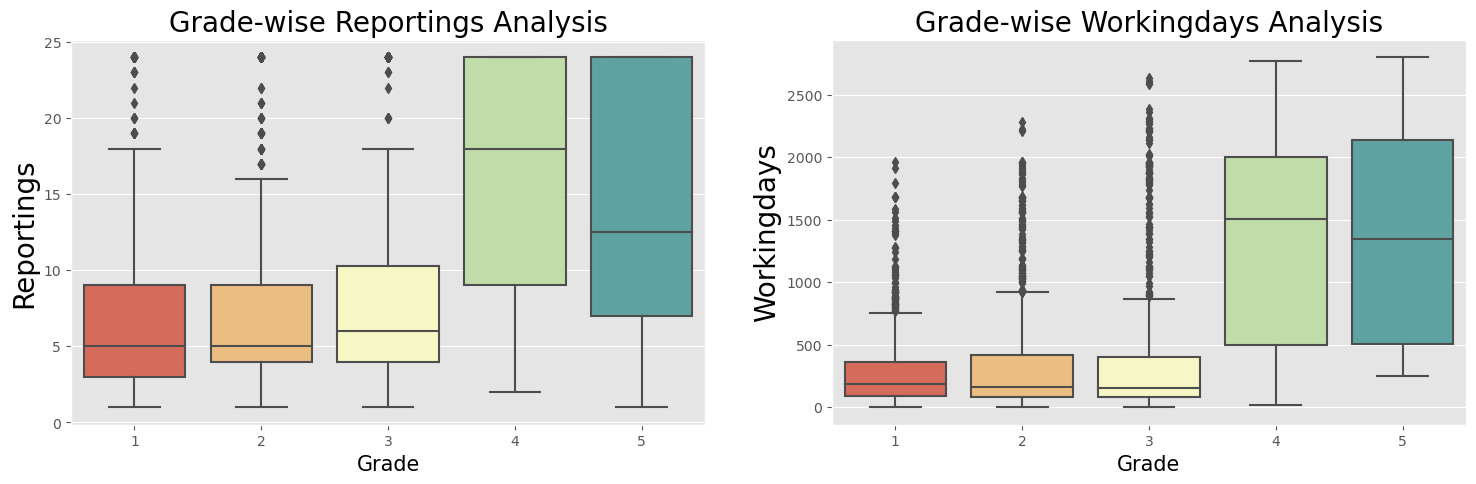

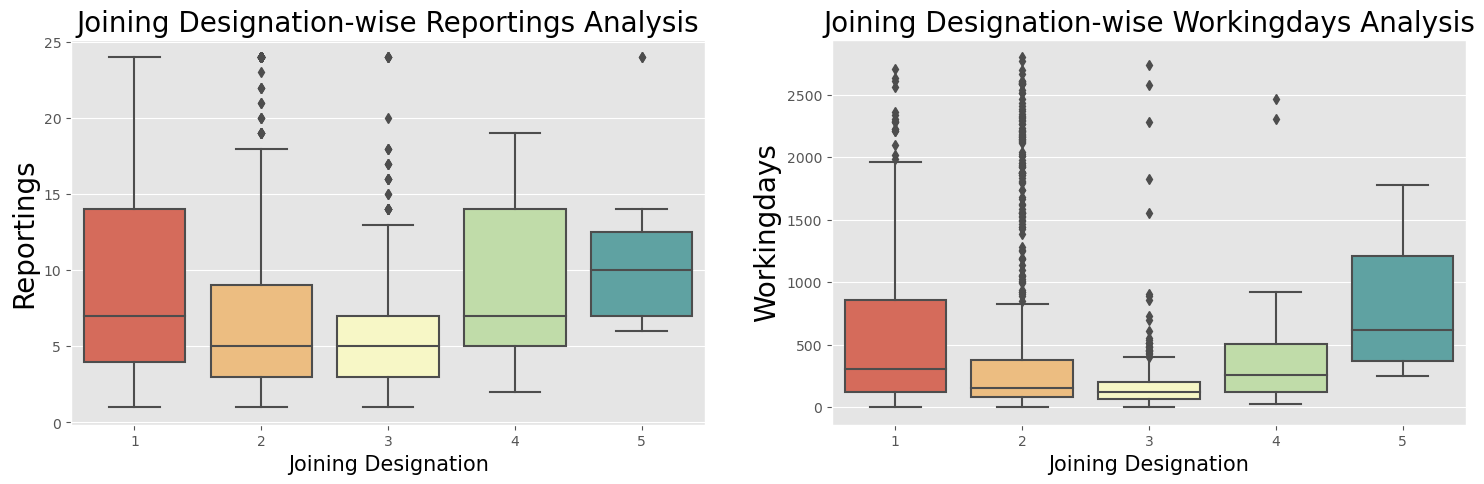

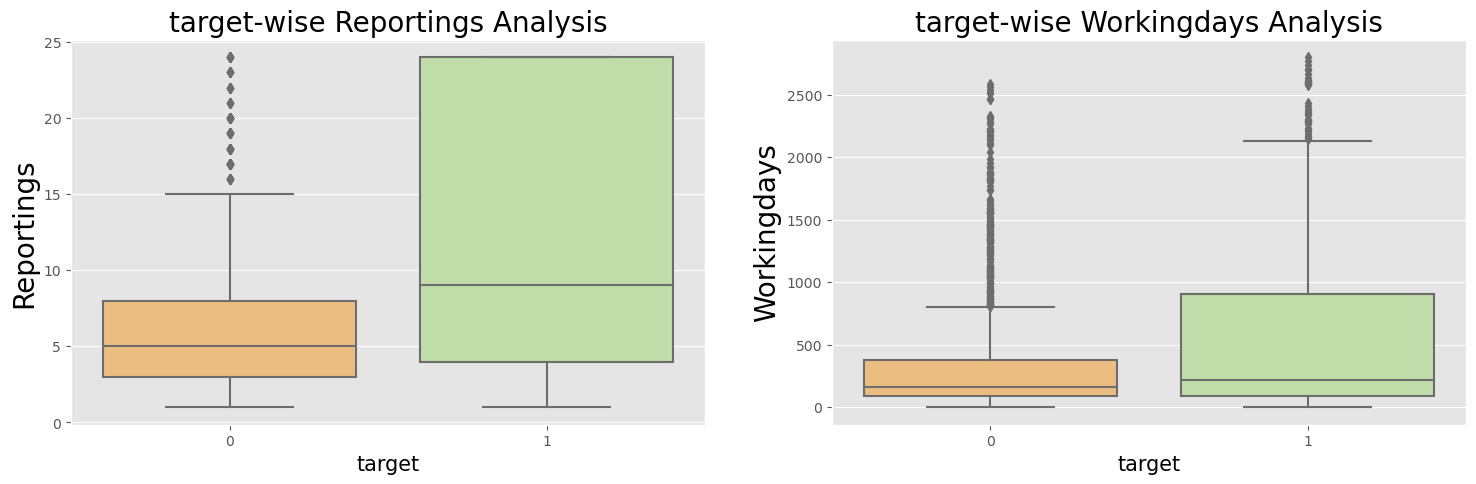

In [78]:
cols = ['Gender', 'Education_Level', 'Grade','Joining Designation','target']
for i in cols:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=ola1[i],y=ola1['Reportings'],palette='Spectral')
    plt.title(f'{i}-wise Reportings Analysis',fontsize=20)
    plt.xlabel(f'{i}',fontsize=15)
    plt.ylabel('Reportings',fontsize=20)
    plt.subplot(1,2,2)
    sns.boxplot(x=ola1[i],y=ola1['Workingdays'],palette='Spectral')
    plt.title(f'{i}-wise Workingdays Analysis',fontsize=20)
    plt.xlabel(f'{i}',fontsize=15)
    plt.ylabel('Workingdays',fontsize=20)
    plt.show()

# `ENSEMBLE LEARNING:- `
### `Data Prepration:-`

`The Trade-Off In general while choosing a model, we might choose to look at precision and recall scores and choose while keeping the follwing trade-off on mind : -`

- If we prioritize precision, we are going to reduce our false positives. This may be useful if our targeted retention strategies prove to be expensive. - We don’t want to spend unnecessarily on somebody who is not even going to leave in the first place. Also, it might lead to uncomfortable situation for the employee themselves if they are put in a situation where it is assumed that they are going to be let go.
- If we prioritize recall, we are going to reduce our false negatives. This is useful since usually the cost of hiring a new person is higher than retaining n experienced person. So, by reducing false negatives, we would be able to better identify those who are actually going to leave and try to retain them by appropriate measures (competitve remuneration, engagement program, etc).


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [80]:
X = ola1.drop('target',axis=1)
y = ola1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [81]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, Y, title):
    train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,X,Y,return_times=True)
    fig, axes = plt.subplots(1, 1, figsize = (15, 5))
    axes.set_title(title)
    axes.plot
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
#     32
    axes.grid()
    axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
    )
    axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
    )
    axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    plt.show()

In [82]:
X.head()

Reportings  Driver_ID  Age  Gender  Education_Level  Grade  \
0           3          1   28       0                2      1   
1           2          2   31       0                2      2   
2           5          4   43       0                2      2   
3           3          5   29       0                0      1   
4           5          6   31       1                1      3   

   Total Business Value  Income  Joining Designation  Quarterly Rating  \
0               1715580  172161                    1                 2   
1                     0  134032                    2                 1   
2                350000  328015                    2                 1   
3                120360  139104                    1                 1   
4               1265000  393640                    3                 2   

   Joining_month  Joining_year  IncomeRaise  GradeUp  Cities  Workingdays  
0             12          2018            0        0      23           67  
1             12          2020            0        0       7           25  
2             11          2019            0        0      13          116  
3             12          2019            0        0       9           51  
4             12          2020            0        0      11          123

In [83]:
ss= StandardScaler()
ss.fit_transform(X_train)

array([[ 2.2954577 , -0.75842576,  0.3805338 , ..., -0.13491433,
        -1.32852775,  2.52041681],
       [-0.91791406,  0.9281145 , -0.94832011, ..., -0.13491433,
         0.80662679, -0.51061478],
       [-1.06397641,  1.54151452,  0.3805338 , ..., -0.13491433,
        -0.37957018, -0.72561875],
       ...,
       [-0.91791406, -0.02978088, -0.78221337, ..., -0.13491433,
        -1.68438684, -0.70639076],
       [-0.479727  ,  0.21186155, -1.11442685, ..., -0.13491433,
        -0.14233078, -0.53508678],
       [ 2.2954577 , -0.43623585,  0.04832032, ..., -0.13491433,
        -1.20990805,  2.17431286]])

In [84]:
from sklearn.model_selection import cross_validate

In [85]:
valid1 = cross_val_score(LogisticRegression(),X,y,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())
valid2 = cross_val_score( DecisionTreeClassifier(),X,y,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())
valid3 = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())
valid4 = cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())
valid5 =cross_val_score(XGBClassifier(),X,y,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

Logistic Regression: [0.76 0.79 0.77 0.79 0.78]
Mean: 0.7755688274126451
Decision Tree: [0.779 0.864 0.846 0.842 0.811]
Mean: 0.8284211811326779
RandomForestClassifier(): [0.87 0.89 0.87 0.89 0.9 ]
Mean: 0.8843235578593497
GradientBoostingClassifier: [0.816 0.883 0.883 0.894 0.874]
Mean: 0.8700293921552056
XGBoostClassifier: [0.76 0.79 0.77 0.79 0.78]
Mean: 0.8739208008188486


# `MACHINE LEARNING MODEL:-`
# `WITHOUT THE TREATMENT OF CLASS IMBALANCE`

### `Random Forest Classifier`

In [86]:
# model = RandomForestClassifier()
# param_grid = { 
#     'n_estimators':list(range(10,20)),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

In [87]:
# clf = GridSearchCV(model,param_grid,cv=10,scoring='recall')
# clf.fit(X_train,y_train)

In [88]:
# clf.best_params_

In [89]:
rf_clf1 = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='log2',n_estimators=17)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=17)

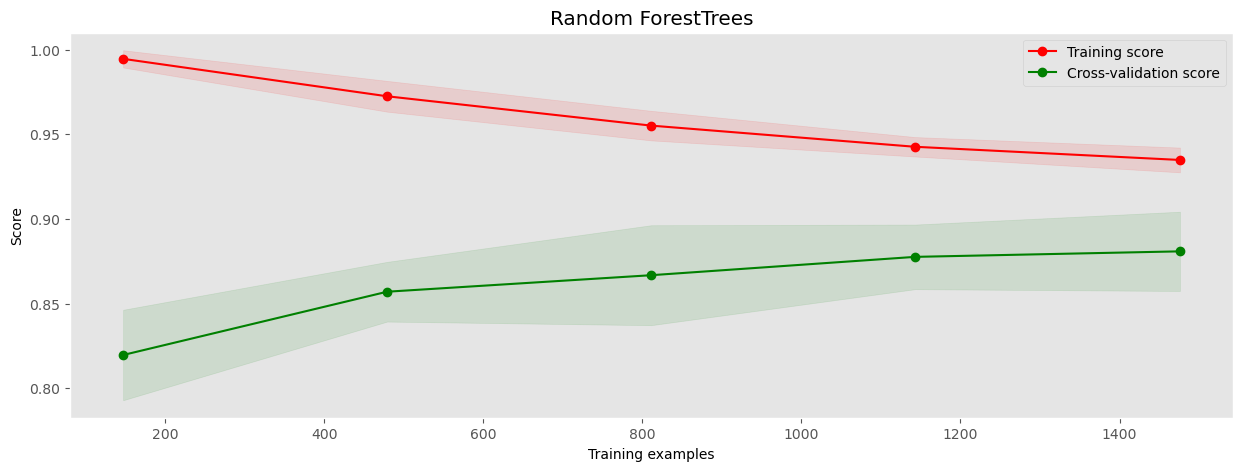

In [90]:
plot_learning_curve(rf_clf1, X_train, y_train, "Random ForestTrees")

**` This suggests that the model is performing well on the data it was trained on, and that it is generalizing well to unseen data.`**

In [91]:
y_pred = rf_clf1.predict(X_test)
proba = rf_clf1.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_clf1.score(X_train, y_train))
print("Test data accuracy:",rf_clf1.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Metrix')
print(confusion_matrix(y_test, y_pred))

Train data accuracy: 0.9328277356446371
Test data accuracy: 0.8961038961038961
Accuracy of the model: 0.8961038961038961
ROC-AUC score test dataset:  0.9533013287222424
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       328
           1       0.89      0.73      0.80       134

    accuracy                           0.90       462
   macro avg       0.89      0.85      0.87       462
weighted avg       0.90      0.90      0.89       462

----------------------------------------------------------------------
Confusion Metrix
[[316  12]
 [ 36  98]]


In [92]:
rf_clf_imp1 = rf_clf1.feature_importances_

### `XG Boosting Classifier`

In [93]:
gbc1 = GradientBoostingClassifier()
gbc1.fit(X_train, y_train)
y_pred = gbc1.predict(X_test)
proba =gbc1.predict_proba(X_test)[:, 1]

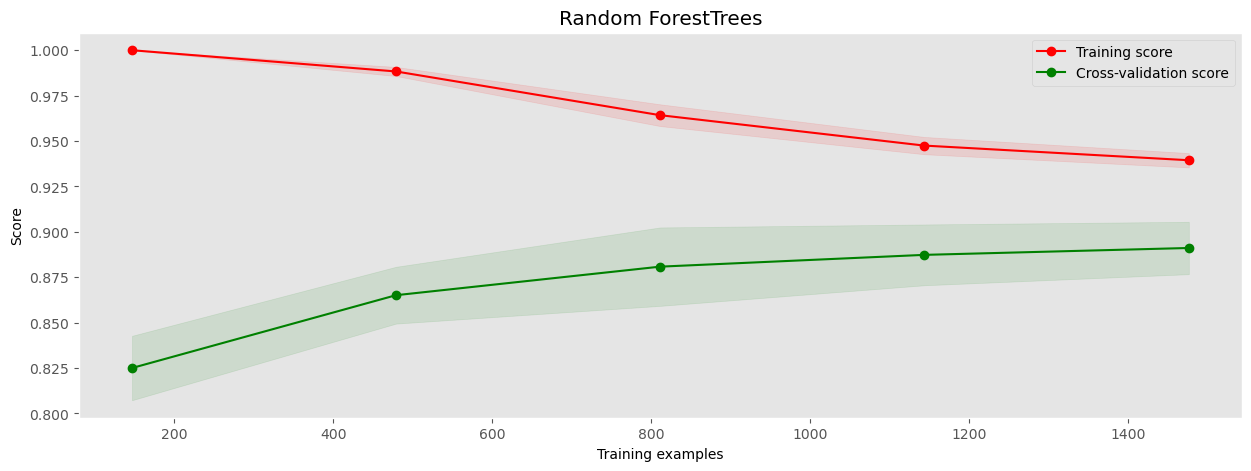

In [94]:
plot_learning_curve(gbc1, X_train, y_train, "Random ForestTrees")

In [95]:
gbc_clf_imp1 = gbc1.feature_importances_

In [96]:
print('Train Score : ', gbc1.score(X_train, y_train))
print('Test Score : ', gbc1.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)
print('Confusion Matrix')
cm2 = (confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('-'*60)

Train Score :  0.933911159263272
Test Score :  0.8939393939393939
Accuracy Score :  0.8939393939393939
ROC-AUC score test dataset:  0.9540407717510011
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       328
           1       0.85      0.78      0.81       134

    accuracy                           0.89       462
   macro avg       0.88      0.86      0.87       462
weighted avg       0.89      0.89      0.89       462

------------------------------------------------------------
Confusion Matrix
[[309  19]
 [ 30 104]]
------------------------------------------------------------


# `CLASS IMBALANCE TREATMENT`

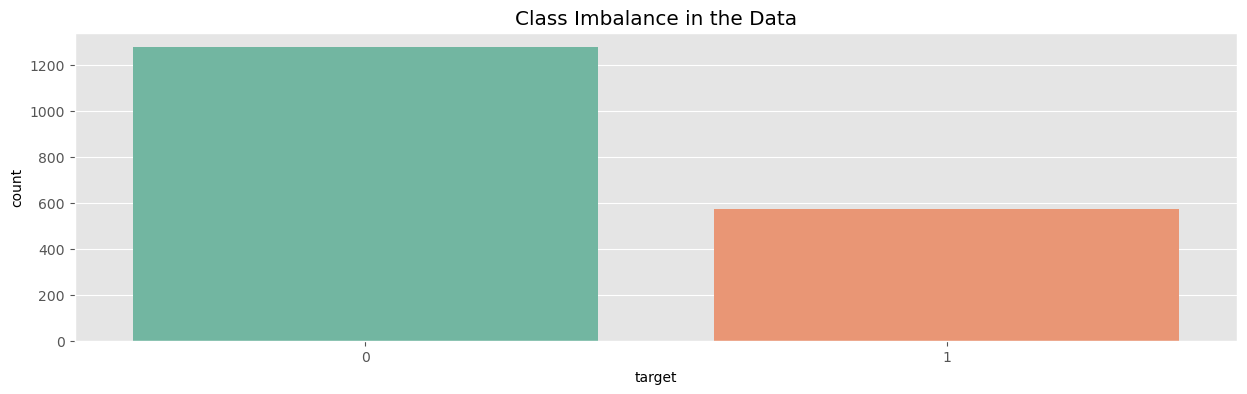

In [97]:
plt.figure(figsize=(15,4))
sns.countplot(x=y_train,palette='Set2')
plt.title('Class Imbalance in the Data')
plt.show()

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
smot = SMOTE(random_state=42)
X_train_smot,y_train_smot = smot.fit_resample(X_train,y_train.ravel())

In [100]:
X_train_smot.shape,y_train_smot.shape

((2550, 16), (2550,))

In [101]:
X_test.shape,y_test.shape

((462, 16), (462,))

In [102]:
from collections import Counter
c = Counter(y_train_smot)
print(c)

Counter({1: 1275, 0: 1275})


### `Randome Forest Classifier`

In [103]:
clf = RandomForestClassifier()
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier()

In [104]:
# param_grid = { 
#     'n_estimators':list(range(10,20)),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

In [105]:
# clf = GridSearchCV(clf,param_grid,cv=10,scoring='recall')
# clf.fit(X_train_smot,y_train_smot)

In [108]:
# clf.best_params_

In [107]:
clf = RandomForestClassifier(criterion='gini',max_depth=8,
                           max_features='auto',n_estimators= 18)
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=18)

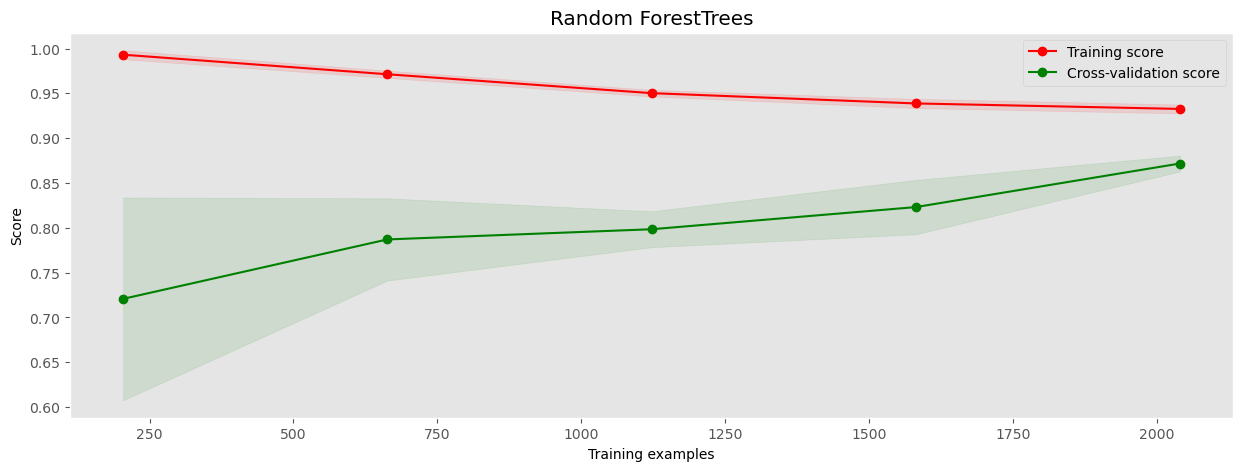

In [109]:
plot_learning_curve(clf, X_train_smot, y_train_smot, "Random ForestTrees")

In [110]:
y_pred = clf.predict(X_test)
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
print('Confusion Metrix')
cm3 = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       328
           1       0.75      0.85      0.80       134

    accuracy                           0.87       462
   macro avg       0.84      0.87      0.85       462
weighted avg       0.88      0.87      0.88       462

----------------------------------------------------------------------
Confusion Metrix
[[290  38]
 [ 20 114]]


In [111]:
rf_clf_imp2= clf.feature_importances_

### `Gradient Boosting`

In [112]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(X_train_smot, y_train_smot)
y_pred1 = gbc2.predict(X_test)
gbc_clf_imp2 = gbc2.feature_importances_
print('-'*60)
print(classification_report(y_test, y_pred1))
print('-'*60)
cm4 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix')
print(cm4)
print('-'*60)

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       328
           1       0.72      0.84      0.78       134

    accuracy                           0.86       462
   macro avg       0.83      0.85      0.84       462
weighted avg       0.87      0.86      0.86       462

------------------------------------------------------------
Confusion Matrix
[[284  44]
 [ 21 113]]
------------------------------------------------------------


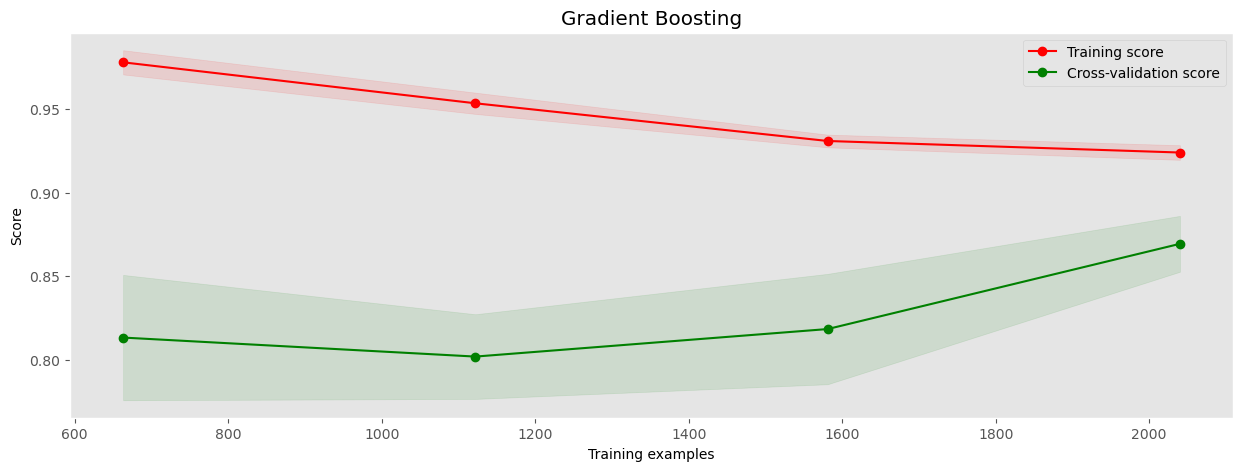

In [113]:
plot_learning_curve(gbc2, X_train_smot, y_train_smot, "Gradient Boosting")

In [114]:
data1 = pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp1,
                    'XGBClassifier':gbc_clf_imp1})

In [115]:
data2 = pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp2,
                    'XGBClassifier':gbc_clf_imp2})

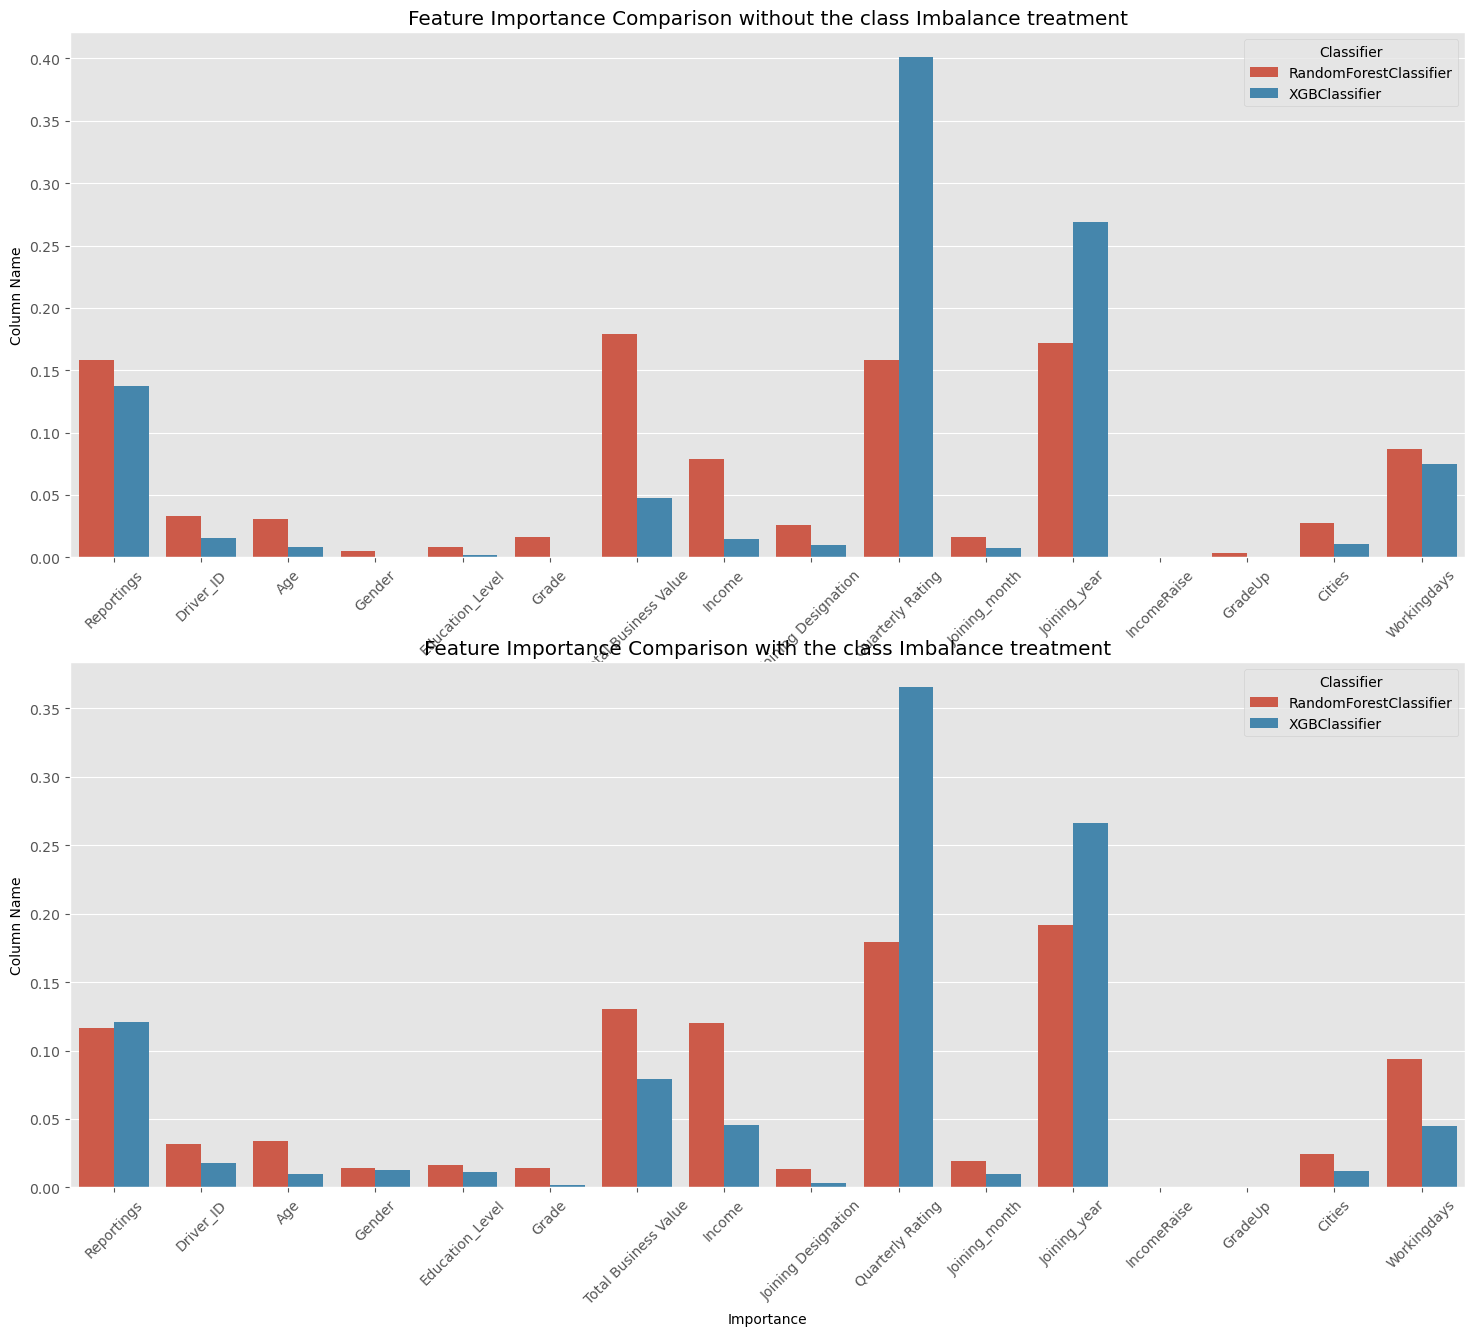

In [116]:
data_melted1 = data1.melt(id_vars='Column_Name', var_name='Classifier', value_name='Importance')
data_melted2 = data2.melt(id_vars='Column_Name', var_name='Classifier', value_name='Importance')
# Plot
plt.figure(figsize=(18,15))
plt.subplot(2,1,1)
sns.barplot(y='Importance', x='Column_Name', hue='Classifier', data=data_melted1)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Column Name')
plt.title('Feature Importance Comparison without the class Imbalance treatment')
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(y='Importance', x='Column_Name', hue='Classifier', data=data_melted2)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Column Name')
plt.title('Feature Importance Comparison with the class Imbalance treatment')
plt.xticks(rotation=45)
# Show plot
plt.show()

## **`Without Class Imbalance Treatment:`**

**Reportings and Total Business Value are Key:**

- RandomForestClassifier ranks Reportings and Total Business Value as highly important.
- XGBClassifier also considers Total Business Value significant.

**Income and Quarterly Rating Importance:**

- RandomForestClassifier places significant importance on Income and Quarterly Rating.
- XGBClassifier emphasizes Quarterly Rating more prominently.

**Joining Year and Age:**

- RandomForestClassifier finds Joining Year and Age relatively important.
- XGBClassifier values Age slightly more than Joining Year.


## **`With Class Imbalance Treatment:`**

**Reportings and Quarterly Rating Dominance:**

- Both classifiers (RandomForestClassifier and XGBClassifier) emphasize Reportings and Quarterly Rating as crucial features.

**Income and Total Business Value Impact:**

- RandomForestClassifier sees Income and Total Business Value as important.
- XGBClassifier highlights Total Business Value significantly.

**Age and Workingdays Importance:**

- RandomForestClassifier finds Age and Workingdays relatively influential.
- XGBClassifier also values Workingdays as a notable feature.

In [117]:
# calculating precision, reall and f1_score for every 
tp1,fp1,fn1,tn1 =cm1[0][0],cm1[0][1],cm1[1][0],cm1[1][1]
tp2,fp2,fn2,tn2 =cm2[0][0],cm2[0][1],cm2[1][0],cm2[1][1]
tp3,fp3,fn3,tn3 =cm3[0][0],cm3[0][1],cm3[1][0],cm3[1][1]
tp4,fp4,fn4,tn4 =cm4[0][0],cm4[0][1],cm4[1][0],cm4[1][1]
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
precision4 = tp4/(tp4+fp4)
recall4 = tp4/(tp4+fn4)
f1_1 = (2*precision1*recall1)/(precision1+recall1)
f1_2 = (2*precision2*recall2)/(precision2+recall2)
f1_3 = (2*precision3*recall3)/(precision3+recall3)
f1_4 =(2*precision4*recall4)/(precision4+recall4)

In [118]:
df = pd.DataFrame({'Model':['RandomForest','GradientBoosting','RandomForest','GradientBoosting'],
                  'Class':['imbalanced','imbalanced','balanced','balanced'],
                  'True_pos':[tp1,tp2,tp3,tp4],
                  'Fal_pos':[fp1,fp2,fp3,fp4],
                  'Fal_neg':[fn1,fn2,fn3,fn4],
                  'True_neg':[tn1,tn2,tn3,tn4],
                  'F1_score%':[f1_1*100,f1_2*100,f1_3*100,f1_4*100],
                  'Precision%':[precision1*100,precision2*100,precision3*100,precision4*100],
                  'Recall%':[recall1*100,recall2*100,recall3*100,recall4*100]})

In [119]:
df

Model       Class  True_pos  Fal_pos  Fal_neg  True_neg  \
0      RandomForest  imbalanced       316       12       36        98   
1  GradientBoosting  imbalanced       309       19       30       104   
2      RandomForest    balanced       290       38       20       114   
3  GradientBoosting    balanced       284       44       21       113   

   F1_score%  Precision%    Recall%  
0  92.941176   96.341463  89.772727  
1  92.653673   94.207317  91.150442  
2  90.909091   88.414634  93.548387  
3  89.731438   86.585366  93.114754

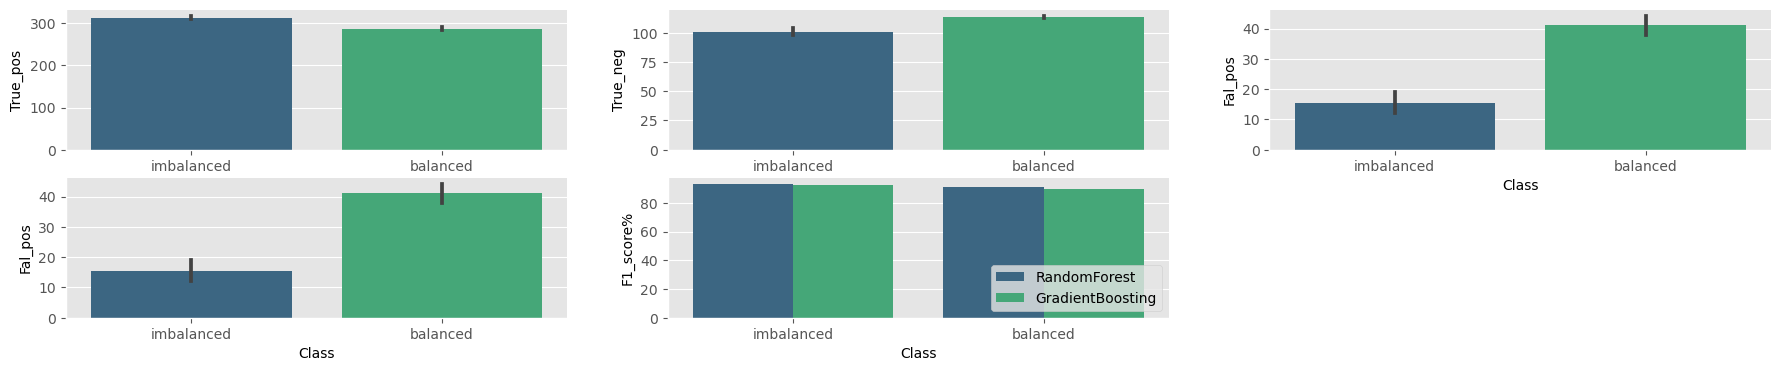

In [120]:
plt.figure(figsize=(22,4))
plt.subplot(2,3,1)
sns.barplot(x=df.Class,y=df.True_pos,palette='viridis')
# plt.show()
plt.subplot(2,3,2)
sns.barplot(x=df.Class,y=df.True_neg,palette='viridis')
# plt.show()
plt.subplot(2,3,3)
sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
# plt.show()
plt.subplot(2,3,4)
sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
plt.subplot(2,3,5)
sns.barplot(x=df.Class,y=df['F1_score%'],palette='viridis',hue=df.Model)
plt.legend(loc='lower right')
sns.despine()
plt.show()

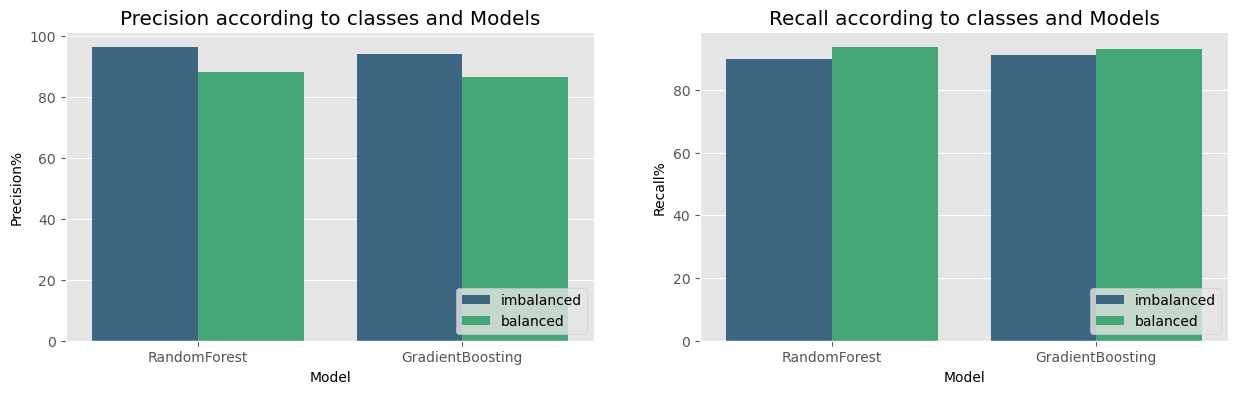

In [121]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x=df.Model,y=df['Precision%'],hue=df.Class,palette='viridis')
plt.title('Precision according to classes and Models')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
sns.barplot(x=df.Model,y=df['Recall%'],hue=df.Class,palette='viridis')
plt.title('Recall according to classes and Models')
plt.legend(loc='lower right')
sns.despine()
plt.show()

## **`Performance in Imbalanced Data:`**

- RandomForest: Achieves higher precision (96.34%) and comparable recall (89.77%) compared to GradientBoosting. This indicates RandomForest is effective in correctly identifying positive cases but slightly less balanced in recall.
- GradientBoosting: Shows robust performance with slightly lower precision (94.21%) but higher recall (91.15%) compared to RandomForest in imbalanced data. It excels in identifying true positives across the dataset.

## **`Impact of Balancing Classes:`**

- RandomForest: When classes are balanced, there's a noticeable improvement in recall (93.55%), indicating its sensitivity to class distribution changes. Precision remains high (88.41%), highlighting its ability to maintain accuracy with balanced data.
- GradientBoosting: While precision and recall decrease marginally in the balanced setting, GradientBoosting maintains stable performance (precision: 86.59%, recall: 93.11%), suggesting resilience to class distribution changes.

## **`Model Comparison:`**

- RandomForest: Preferred when high precision and balanced class representation are crucial. It adapts well to balanced data, improving recall significantly.
- GradientBoosting: Offers consistent performance across different class distributions, making it suitable when dealing with varying degrees of class imbalance or when balanced classes are not easily achievable.

# `INSIGHTS`

- So we see that there are 57% male employees and 43% female employees.
- The percentages of employees with different education levels are almost same for level 1 & 2.
- 97.3% of the employees who did not get a raise. 
- Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
- Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.
- Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income. 
- Number of employees has been increase with increase in year as well as number of reportings.
- The majority of the employees seem to be associated with city C20.
- Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
- Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
- Income decreses with increase in Destination as about 4% of the employees hold higher designations.
- The median of the Income for employees having higher Grades is greater.
- Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.
- Joining Designation Increases with increase in Grade.
- Top reporting days is 24 days.
- About 55% of the reportings of the employees has got Quarlerly Rating 1.
- Number of reportings increases with increase in Income as well as Total Business Value.
- Recall increased after treatment of data imbalance and is performing bettee in Gradient Boosting.
- Precision dropped after treatment of data imbalance and is performing better in Random Forest.
- F1_score incresed after the treatment of imabalanced data and in Gradient Boosting.

# `RECOMMENDATIONS`

- Both the models give maximum importance to reportings of the Drivers. Drivers who had been 
tagged that will not churn have higher reportings than those who are tagged with churn also Reportings 
increase with year.
- We saw that the percentage of employees who received a raise was only 2.6%, whereas 49.3% of
the employees received a promotion. It appears that promotion does not guarantee an increase
in compensation. Employees may not be motivated to continue working for an organization
if they feel that they are undervalued in terms of financial compensation.
- We saw that quarterly rating also an important indicator of whether the employee might leave
voluntarily/involuntarily. A lot of employees have the lowest quarterly rating and the attrition
among them is high. The organization might look into improvement programs for
underperforming employees before they are let go, or before they resign. Also, improvement
in rating can be rewarded to encourage better performance.
- Salaries must be competitve to prevent losing employees to attrition and since almost 63% of
employees attrited in a small span, it seems that correction of payscales is necessary for the
organization since hiring new employees is costlier than retaining old ones.
- Specific employee engagement programs can also be introduced targeting the different 
categories of performers to help them achieve their goals as well as help them increase their
contribution towards the business value. The hiring process can also be restructured since a
lot of new hires seem to be leaving (median experience is lower for attrited employees).
- Gender can be seen playing a role in feature importance. About 43% of the drivers
are female and are also holding about 42.2% of the Income generated entirely.
Female drivers should be encouraged to join the business as it is evident that about 
42.2% of the sum of all the reportings have been done by Females.
- A programme or event for Monthly reward as bonus or in kind should be offered to drivers if 
they get the maximum reportings within a month to ensure participation in reportings as well as 
higher grade and designation.

# `SUBMITTED BY:`
## `NOOHI NAAZ`
